In [1]:
# Instalar dependencias necesarias
!pip install mlflow dagshub --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 79.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 120.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.1/260.1 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 119.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 700.2/700.2 kB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
# 1. Configuración del entorno e importaciones
# --------------------------------------------
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from getpass import getpass
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import mlflow
import mlflow.data
import mlflow.sklearn

In [3]:
# -------------------- CONFIGURACIÓN MLFLOW --------------------

# Finalizar cualquier sesión de MLflow activa
try:
    mlflow.end_run()
    print("Sesión anterior de MLflow finalizada")
except:
    pass

# Configurar MLflow
try:
    print("Configurando MLflow...")
    os.environ['MLFLOW_TRACKING_URI'] = 'https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow'
    os.environ['MLFLOW_TRACKING_USERNAME'] = 'AngelBReal'

    # Solo solicita el token si no está configurado
    if 'MLFLOW_TRACKING_PASSWORD' not in os.environ:
        os.environ['MLFLOW_TRACKING_PASSWORD'] = getpass('Token DagsHub: ')

    # Configurar URI
    mlflow.set_tracking_uri(os.environ['MLFLOW_TRACKING_URI'])
    print(f"URI de tracking: {mlflow.get_tracking_uri()}")
except Exception as e:
    print(f"Error en configuración remota: {e}")
    print("Usando MLflow en modo local")
    mlflow.set_tracking_uri(None)

Sesión anterior de MLflow finalizada
Configurando MLflow...
Token DagsHub: ··········
URI de tracking: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow


In [11]:
# Cargar dataset
print("\nCargando dataset...")
df = pd.read_csv("/content/classical_models.csv")
print(f"Dataset cargado: {df.shape[0]} filas, {df.shape[1]} columnas")

# Ver información sobre valores faltantes
missing_values = df.isnull().sum().sum()
print(f"Total de valores faltantes en el dataset: {missing_values}")
print(f"Columnas con valores faltantes: {df.columns[df.isnull().any()].tolist()}")

# Limpiar valores faltantes
df_clean = df.dropna(subset=['label'])
print(f"Dataset después de limpiar filas con label nulo: {df_clean.shape[0]} filas")

# Imputar valores faltantes en las características
from sklearn.impute import SimpleImputer

# Separar características y variable objetivo
X = df_clean.drop(columns=["label"])
y = df_clean["label"]

# Imputar valores faltantes en X (reemplazar NaN con la media)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
print(f"Valores faltantes imputados en el conjunto de características")

# Verificar que no hay más valores faltantes
print(f"Valores faltantes después de imputación: {np.isnan(X_imputed).sum()}")

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y,
                                                   test_size=0.2,
                                                   random_state=42)

print(f"Conjunto de entrenamiento: {X_train.shape}")
print(f"Conjunto de prueba: {X_test.shape}")

# Escalar características (importante para modelos lineales)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Cargando dataset...


<ipython-input-11-7c67ad4d8784>:3: DtypeWarning: Columns (9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,26

Dataset cargado: 3878 filas, 861 columnas
Total de valores faltantes en el dataset: 701715
Columnas con valores faltantes: ['label', 'title_length', 'content_length', 'title_word_count', 'content_word_count', 'num_uppercase_words', 'has_known_source', 'fake_word_in_title', 'exclam_density', 'source_20 Minutos', 'source_2020 News', 'source_AARP', 'source_ABC', 'source_ABC EL RECREO', 'source_ABC Noticias', 'source_ABC sociedad', 'source_AEMPS', 'source_AFPFactual', 'source_ANONYMOUS  AZTECA', 'source_ARGUMENTO POLÍTICO', 'source_AS', 'source_Actualidad', 'source_Actualidad RT', 'source_Agencia EFE', 'source_Alerta Digital', 'source_Alerta Nacional', 'source_Alerta digital', 'source_Animal Politico ', 'source_Animal Político', 'source_Animal político', 'source_Antena 3', 'source_Argumento Político', 'source_Aristegui Noticias', 'source_Aristegui noticias', 'source_Astillas de realidad', 'source_AvcNoticia', 'source_Azteca Deporte', 'source_BBC', 'source_BBC News', 'source_Billboard', 'so

Experimento configurado: Regresión Noticias Falsas

Ejecución principal iniciada: 6d2db02deecb4f549ad7e4ae6c3274e6
Total de modelos a probar: 30

=== Probando modelo: LinearRegression ===

Combinación 1/30:
Modelo: LinearRegression, Parámetros: sin hiperparámetros
Ejecución anidada iniciada: 157a5320dd434ef086d018c882e38009
Entrenando modelo...
MSE: 0.165677
RMSE: 0.407034
MAE: 0.313833
R²: 0.240332


2025/05/05 06:48:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


¡Nuevo mejor modelo encontrado!
🏃 View run LinearRegression - sin hiperparámetros at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4/runs/157a5320dd434ef086d018c882e38009
🧪 View experiment at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4

=== Probando modelo: Ridge ===

Combinación 2/30:
Modelo: Ridge, Parámetros: {'alpha': 0.01, 'solver': 'auto'}
Ejecución anidada iniciada: aac63aedc669425d8f154fc1e4f64ff5
Entrenando modelo...
MSE: 0.165556
RMSE: 0.406886
MAE: 0.313760
R²: 0.240886


2025/05/05 06:48:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


¡Nuevo mejor modelo encontrado!
🏃 View run Ridge - {'alpha': 0.01, 'solver': 'auto'} at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4/runs/aac63aedc669425d8f154fc1e4f64ff5
🧪 View experiment at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4

Combinación 3/30:
Modelo: Ridge, Parámetros: {'alpha': 0.01, 'solver': 'svd'}
Ejecución anidada iniciada: 64bba4f864db4570a0d2162fc9706e71
Entrenando modelo...
MSE: 0.165556
RMSE: 0.406886
MAE: 0.313760
R²: 0.240886


2025/05/05 06:48:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Ridge - {'alpha': 0.01, 'solver': 'svd'} at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4/runs/64bba4f864db4570a0d2162fc9706e71
🧪 View experiment at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4

Combinación 4/30:
Modelo: Ridge, Parámetros: {'alpha': 0.01, 'solver': 'cholesky'}
Ejecución anidada iniciada: 90c1f921b9cf45cc8d6e644fcee4970d
Entrenando modelo...
MSE: 0.165556
RMSE: 0.406886
MAE: 0.313760
R²: 0.240886


2025/05/05 06:48:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Ridge - {'alpha': 0.01, 'solver': 'cholesky'} at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4/runs/90c1f921b9cf45cc8d6e644fcee4970d
🧪 View experiment at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4

Combinación 5/30:
Modelo: Ridge, Parámetros: {'alpha': 0.1, 'solver': 'auto'}
Ejecución anidada iniciada: d137cdc3bf7b4a7bb21ffbacd2046c2b
Entrenando modelo...
MSE: 0.164546
RMSE: 0.405642
MAE: 0.313135
R²: 0.245520


2025/05/05 06:49:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


¡Nuevo mejor modelo encontrado!
🏃 View run Ridge - {'alpha': 0.1, 'solver': 'auto'} at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4/runs/d137cdc3bf7b4a7bb21ffbacd2046c2b
🧪 View experiment at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4

Combinación 6/30:
Modelo: Ridge, Parámetros: {'alpha': 0.1, 'solver': 'svd'}
Ejecución anidada iniciada: 822c78912b934135af55988d42ca7cca
Entrenando modelo...
MSE: 0.164546
RMSE: 0.405642
MAE: 0.313135
R²: 0.245520


2025/05/05 06:49:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Ridge - {'alpha': 0.1, 'solver': 'svd'} at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4/runs/822c78912b934135af55988d42ca7cca
🧪 View experiment at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4

Combinación 7/30:
Modelo: Ridge, Parámetros: {'alpha': 0.1, 'solver': 'cholesky'}
Ejecución anidada iniciada: ed5021511d1b446f8bd25185c6383577
Entrenando modelo...
MSE: 0.164546
RMSE: 0.405642
MAE: 0.313135
R²: 0.245520


2025/05/05 06:49:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
<ipython-input-12-b1229f907d26>:169: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


🏃 View run Ridge - {'alpha': 0.1, 'solver': 'cholesky'} at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4/runs/ed5021511d1b446f8bd25185c6383577
🧪 View experiment at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4

Combinación 8/30:
Modelo: Ridge, Parámetros: {'alpha': 1.0, 'solver': 'auto'}
Ejecución anidada iniciada: d3ba1103decd4058b5e979798012cc93
Entrenando modelo...
MSE: 0.158765
RMSE: 0.398453
MAE: 0.309546
R²: 0.272027


2025/05/05 06:50:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


¡Nuevo mejor modelo encontrado!
🏃 View run Ridge - {'alpha': 1.0, 'solver': 'auto'} at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4/runs/d3ba1103decd4058b5e979798012cc93
🧪 View experiment at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4

Combinación 9/30:
Modelo: Ridge, Parámetros: {'alpha': 1.0, 'solver': 'svd'}
Ejecución anidada iniciada: b5b6cf49766a40318c778401bf10ddee
Entrenando modelo...
MSE: 0.158765
RMSE: 0.398453
MAE: 0.309546
R²: 0.272027


2025/05/05 06:50:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Ridge - {'alpha': 1.0, 'solver': 'svd'} at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4/runs/b5b6cf49766a40318c778401bf10ddee
🧪 View experiment at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4

Combinación 10/30:
Modelo: Ridge, Parámetros: {'alpha': 1.0, 'solver': 'cholesky'}
Ejecución anidada iniciada: 548c03f673734c798d40f180f62fc5d8
Entrenando modelo...
MSE: 0.158765
RMSE: 0.398453
MAE: 0.309546
R²: 0.272027


2025/05/05 06:50:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Ridge - {'alpha': 1.0, 'solver': 'cholesky'} at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4/runs/548c03f673734c798d40f180f62fc5d8
🧪 View experiment at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4

Combinación 11/30:
Modelo: Ridge, Parámetros: {'alpha': 10.0, 'solver': 'auto'}
Ejecución anidada iniciada: 70ee857acab14e5abc9432b061b8b743
Entrenando modelo...
MSE: 0.151204
RMSE: 0.388850
MAE: 0.305667
R²: 0.306693


2025/05/05 06:51:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


¡Nuevo mejor modelo encontrado!
🏃 View run Ridge - {'alpha': 10.0, 'solver': 'auto'} at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4/runs/70ee857acab14e5abc9432b061b8b743
🧪 View experiment at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4

Combinación 12/30:
Modelo: Ridge, Parámetros: {'alpha': 10.0, 'solver': 'svd'}
Ejecución anidada iniciada: bf07e7cd9d574c82af08e620a26ac2bf
Entrenando modelo...
MSE: 0.151204
RMSE: 0.388850
MAE: 0.305667
R²: 0.306693


2025/05/05 06:51:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


¡Nuevo mejor modelo encontrado!
🏃 View run Ridge - {'alpha': 10.0, 'solver': 'svd'} at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4/runs/bf07e7cd9d574c82af08e620a26ac2bf
🧪 View experiment at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4

Combinación 13/30:
Modelo: Ridge, Parámetros: {'alpha': 10.0, 'solver': 'cholesky'}
Ejecución anidada iniciada: fdddcd3e9a2244f2b5b57b0c634a6bd4
Entrenando modelo...
MSE: 0.151204
RMSE: 0.388850
MAE: 0.305667
R²: 0.306693


2025/05/05 06:51:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Ridge - {'alpha': 10.0, 'solver': 'cholesky'} at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4/runs/fdddcd3e9a2244f2b5b57b0c634a6bd4
🧪 View experiment at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4

=== Probando modelo: Lasso ===

Combinación 14/30:
Modelo: Lasso, Parámetros: {'alpha': 0.01, 'max_iter': 1000}
Ejecución anidada iniciada: 28a9e728792248949da2ecff21e6e47d
Entrenando modelo...
MSE: 0.136614
RMSE: 0.369613
MAE: 0.282587
R²: 0.373594


2025/05/05 06:51:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


¡Nuevo mejor modelo encontrado!
🏃 View run Lasso - {'alpha': 0.01, 'max_iter': 1000} at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4/runs/28a9e728792248949da2ecff21e6e47d
🧪 View experiment at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4

Combinación 15/30:
Modelo: Lasso, Parámetros: {'alpha': 0.01, 'max_iter': 3000}
Ejecución anidada iniciada: 01609bf8b160487f9457c7f8e3248e8a
Entrenando modelo...
MSE: 0.136614
RMSE: 0.369613
MAE: 0.282587
R²: 0.373594


2025/05/05 06:52:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Lasso - {'alpha': 0.01, 'max_iter': 3000} at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4/runs/01609bf8b160487f9457c7f8e3248e8a
🧪 View experiment at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4

Combinación 16/30:
Modelo: Lasso, Parámetros: {'alpha': 0.1, 'max_iter': 1000}
Ejecución anidada iniciada: fc1e5e466f194557a94e0827070279b7
Entrenando modelo...
MSE: 0.203859
RMSE: 0.451508
MAE: 0.413847
R²: 0.065259


2025/05/05 06:52:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Lasso - {'alpha': 0.1, 'max_iter': 1000} at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4/runs/fc1e5e466f194557a94e0827070279b7
🧪 View experiment at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4

Combinación 17/30:
Modelo: Lasso, Parámetros: {'alpha': 0.1, 'max_iter': 3000}
Ejecución anidada iniciada: 26e21f87fff2406e9487b0019e19fd9f
Entrenando modelo...
MSE: 0.203859
RMSE: 0.451508
MAE: 0.413847
R²: 0.065259


2025/05/05 06:52:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Lasso - {'alpha': 0.1, 'max_iter': 3000} at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4/runs/26e21f87fff2406e9487b0019e19fd9f
🧪 View experiment at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4

Combinación 18/30:
Modelo: Lasso, Parámetros: {'alpha': 1.0, 'max_iter': 1000}
Ejecución anidada iniciada: 149144c17e6f4108b68265a71f8f9b3a
Entrenando modelo...
MSE: 0.218312
RMSE: 0.467238
MAE: 0.430881
R²: -0.001010


2025/05/05 06:53:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Lasso - {'alpha': 1.0, 'max_iter': 1000} at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4/runs/149144c17e6f4108b68265a71f8f9b3a
🧪 View experiment at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4

Combinación 19/30:
Modelo: Lasso, Parámetros: {'alpha': 1.0, 'max_iter': 3000}
Ejecución anidada iniciada: 80b86c5ecd9a4333919cbe598e6a18e2
Entrenando modelo...
MSE: 0.218312
RMSE: 0.467238
MAE: 0.430881
R²: -0.001010


2025/05/05 06:53:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Lasso - {'alpha': 1.0, 'max_iter': 3000} at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4/runs/80b86c5ecd9a4333919cbe598e6a18e2
🧪 View experiment at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4

Combinación 20/30:
Modelo: Lasso, Parámetros: {'alpha': 10.0, 'max_iter': 1000}
Ejecución anidada iniciada: 4295693d09854d7baf3b83b0d24d9530
Entrenando modelo...
MSE: 0.218312
RMSE: 0.467238
MAE: 0.430881
R²: -0.001010


2025/05/05 06:53:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Lasso - {'alpha': 10.0, 'max_iter': 1000} at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4/runs/4295693d09854d7baf3b83b0d24d9530
🧪 View experiment at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4

Combinación 21/30:
Modelo: Lasso, Parámetros: {'alpha': 10.0, 'max_iter': 3000}
Ejecución anidada iniciada: 366ac2b18bf242b48e964dd8c82d1a82
Entrenando modelo...
MSE: 0.218312
RMSE: 0.467238
MAE: 0.430881
R²: -0.001010


2025/05/05 06:54:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Lasso - {'alpha': 10.0, 'max_iter': 3000} at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4/runs/366ac2b18bf242b48e964dd8c82d1a82
🧪 View experiment at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4

=== Probando modelo: ElasticNet ===

Combinación 22/30:
Modelo: ElasticNet, Parámetros: {'alpha': 0.01, 'l1_ratio': 0.2, 'max_iter': 1000}
Ejecución anidada iniciada: 55c0e964c09c46fbb58aee78f252b582
Entrenando modelo...
MSE: 0.137528
RMSE: 0.370848
MAE: 0.275037
R²: 0.369400


2025/05/05 06:54:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run ElasticNet - {'alpha': 0.01, 'l1_ratio': 0.2, 'max_iter': 1000} at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4/runs/55c0e964c09c46fbb58aee78f252b582
🧪 View experiment at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4

Combinación 23/30:
Modelo: ElasticNet, Parámetros: {'alpha': 0.01, 'l1_ratio': 0.5, 'max_iter': 1000}
Ejecución anidada iniciada: 93ba84ff8a544ffdb7950c5a0c1ae58d
Entrenando modelo...
MSE: 0.134502
RMSE: 0.366745
MAE: 0.269455
R²: 0.383279


2025/05/05 06:54:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


¡Nuevo mejor modelo encontrado!
🏃 View run ElasticNet - {'alpha': 0.01, 'l1_ratio': 0.5, 'max_iter': 1000} at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4/runs/93ba84ff8a544ffdb7950c5a0c1ae58d
🧪 View experiment at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4

Combinación 24/30:
Modelo: ElasticNet, Parámetros: {'alpha': 0.01, 'l1_ratio': 0.8, 'max_iter': 1000}
Ejecución anidada iniciada: 6f239c6ef39341eead22e8c8a6f23b37
Entrenando modelo...
MSE: 0.135238
RMSE: 0.367747
MAE: 0.275876
R²: 0.379903


2025/05/05 06:54:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run ElasticNet - {'alpha': 0.01, 'l1_ratio': 0.8, 'max_iter': 1000} at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4/runs/6f239c6ef39341eead22e8c8a6f23b37
🧪 View experiment at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4

Combinación 25/30:
Modelo: ElasticNet, Parámetros: {'alpha': 0.1, 'l1_ratio': 0.2, 'max_iter': 1000}
Ejecución anidada iniciada: 0b1fbf9f99e14e67b3031345ba9ce8f1
Entrenando modelo...
MSE: 0.153525
RMSE: 0.391822
MAE: 0.330695
R²: 0.296053


2025/05/05 06:55:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run ElasticNet - {'alpha': 0.1, 'l1_ratio': 0.2, 'max_iter': 1000} at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4/runs/0b1fbf9f99e14e67b3031345ba9ce8f1
🧪 View experiment at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4

Combinación 26/30:
Modelo: ElasticNet, Parámetros: {'alpha': 0.1, 'l1_ratio': 0.5, 'max_iter': 1000}
Ejecución anidada iniciada: ac8173fd656e4766afbfb054c0983f01
Entrenando modelo...
MSE: 0.177797
RMSE: 0.421659
MAE: 0.375315
R²: 0.184761


2025/05/05 06:55:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run ElasticNet - {'alpha': 0.1, 'l1_ratio': 0.5, 'max_iter': 1000} at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4/runs/ac8173fd656e4766afbfb054c0983f01
🧪 View experiment at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4

Combinación 27/30:
Modelo: ElasticNet, Parámetros: {'alpha': 0.1, 'l1_ratio': 0.8, 'max_iter': 1000}
Ejecución anidada iniciada: 84a2b37375c94408a1a3c9cbf2ad3f32
Entrenando modelo...
MSE: 0.197126
RMSE: 0.443988
MAE: 0.403846
R²: 0.096133


2025/05/05 06:55:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run ElasticNet - {'alpha': 0.1, 'l1_ratio': 0.8, 'max_iter': 1000} at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4/runs/84a2b37375c94408a1a3c9cbf2ad3f32
🧪 View experiment at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4

Combinación 28/30:
Modelo: ElasticNet, Parámetros: {'alpha': 1.0, 'l1_ratio': 0.2, 'max_iter': 1000}
Ejecución anidada iniciada: 740780ac754b4af0a1d2b77a6b580601
Entrenando modelo...
MSE: 0.218312
RMSE: 0.467238
MAE: 0.430881
R²: -0.001010


2025/05/05 06:56:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run ElasticNet - {'alpha': 1.0, 'l1_ratio': 0.2, 'max_iter': 1000} at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4/runs/740780ac754b4af0a1d2b77a6b580601
🧪 View experiment at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4

Combinación 29/30:
Modelo: ElasticNet, Parámetros: {'alpha': 1.0, 'l1_ratio': 0.5, 'max_iter': 1000}
Ejecución anidada iniciada: 8ea1debaafe2434181ceeb18059bdc1d
Entrenando modelo...
MSE: 0.218312
RMSE: 0.467238
MAE: 0.430881
R²: -0.001010


2025/05/05 06:56:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run ElasticNet - {'alpha': 1.0, 'l1_ratio': 0.5, 'max_iter': 1000} at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4/runs/8ea1debaafe2434181ceeb18059bdc1d
🧪 View experiment at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4

Combinación 30/30:
Modelo: ElasticNet, Parámetros: {'alpha': 1.0, 'l1_ratio': 0.8, 'max_iter': 1000}
Ejecución anidada iniciada: ab5a66ee79e840c790af374d36f8248e
Entrenando modelo...
MSE: 0.218312
RMSE: 0.467238
MAE: 0.430881
R²: -0.001010


2025/05/05 06:56:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run ElasticNet - {'alpha': 1.0, 'l1_ratio': 0.8, 'max_iter': 1000} at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4/runs/ab5a66ee79e840c790af374d36f8248e
🧪 View experiment at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4

=== MEJOR MODELO ENCONTRADO ===
Tipo: ElasticNet
Parámetros: {'alpha': 0.01, 'l1_ratio': 0.5, 'max_iter': 1000}
R²: 0.383279


2025/05/05 06:56:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Modelos Lineales at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4/runs/6d2db02deecb4f549ad7e4ae6c3274e6
🧪 View experiment at: https://dagshub.com/AngelBReal/DeAMentis-AAA.mlflow/#/experiments/4

Proceso completado.


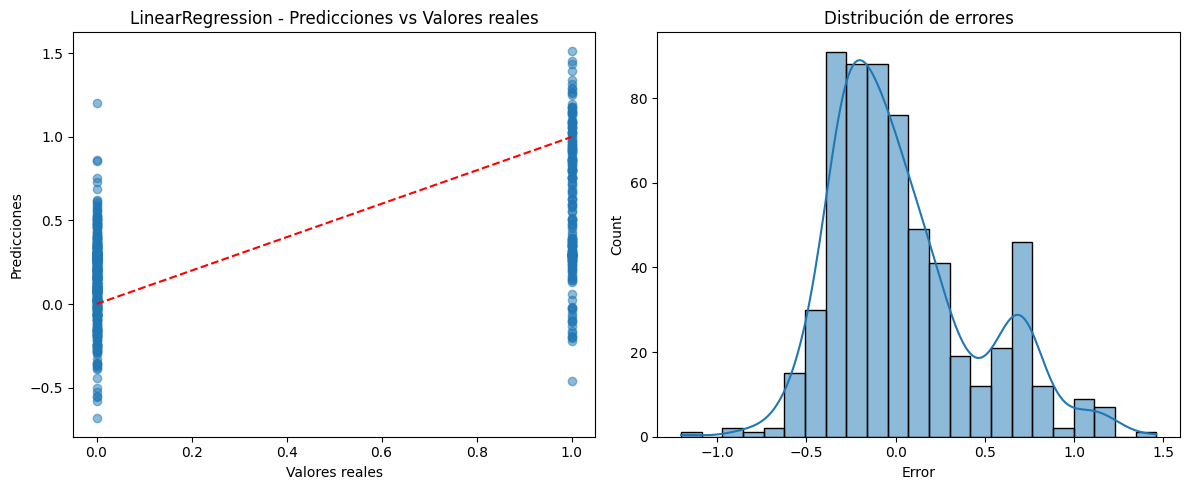

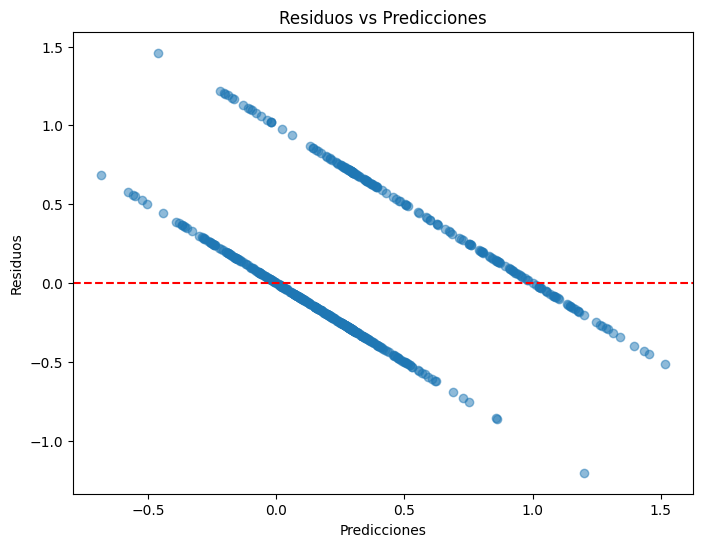

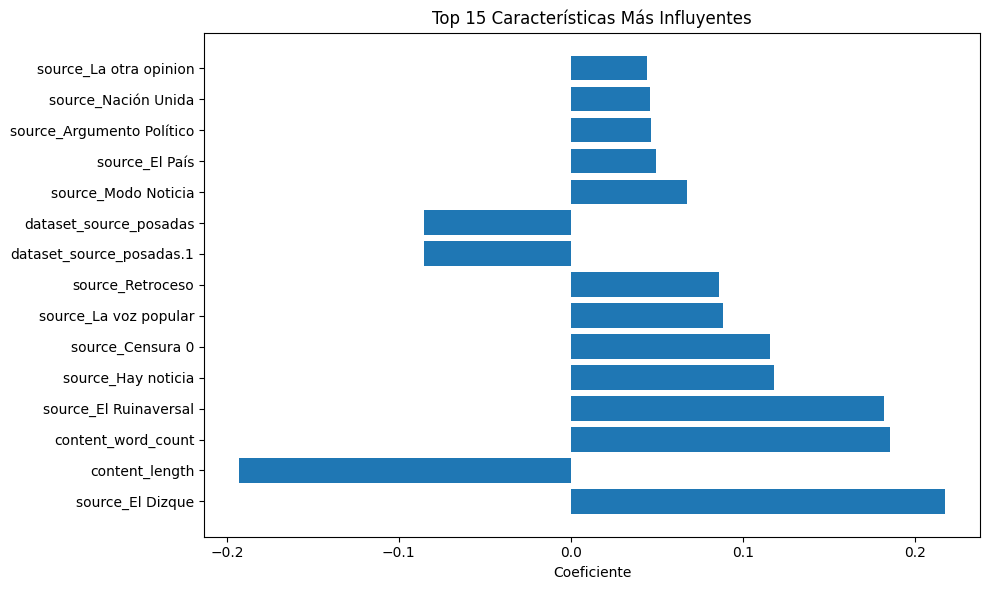

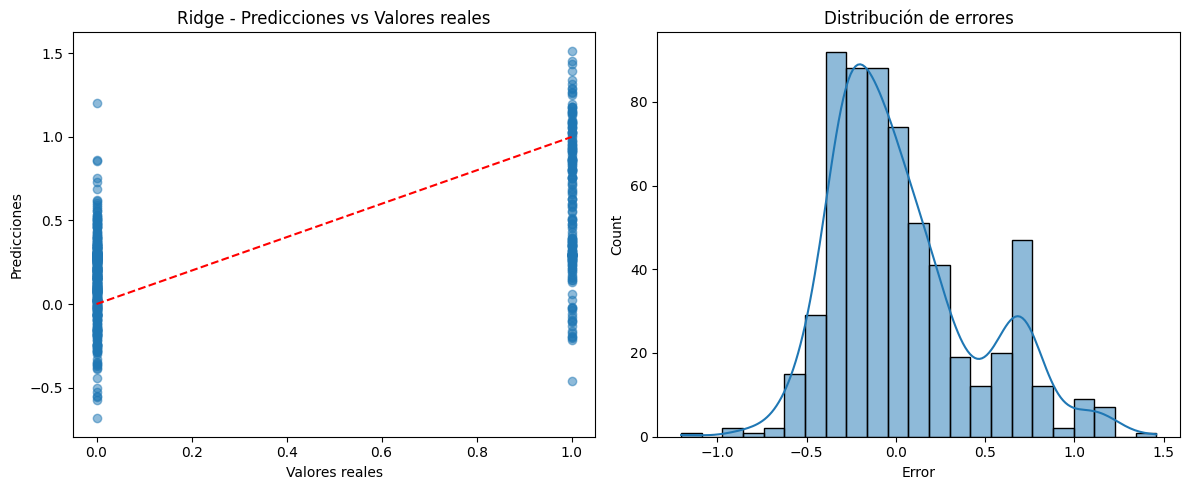

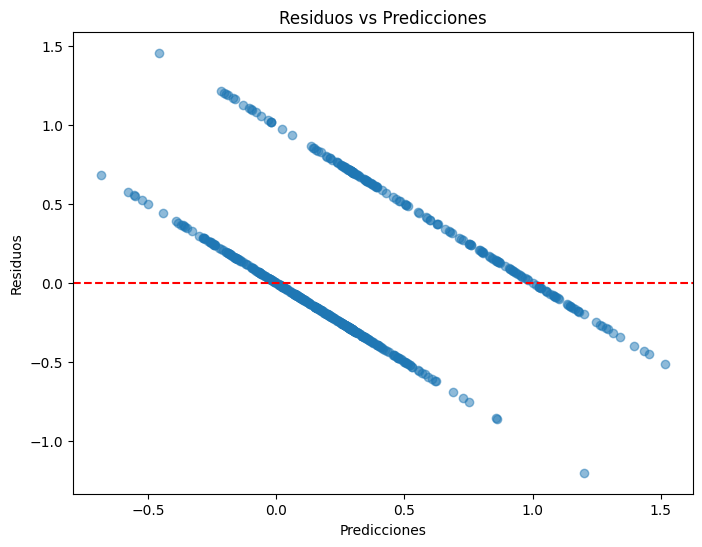

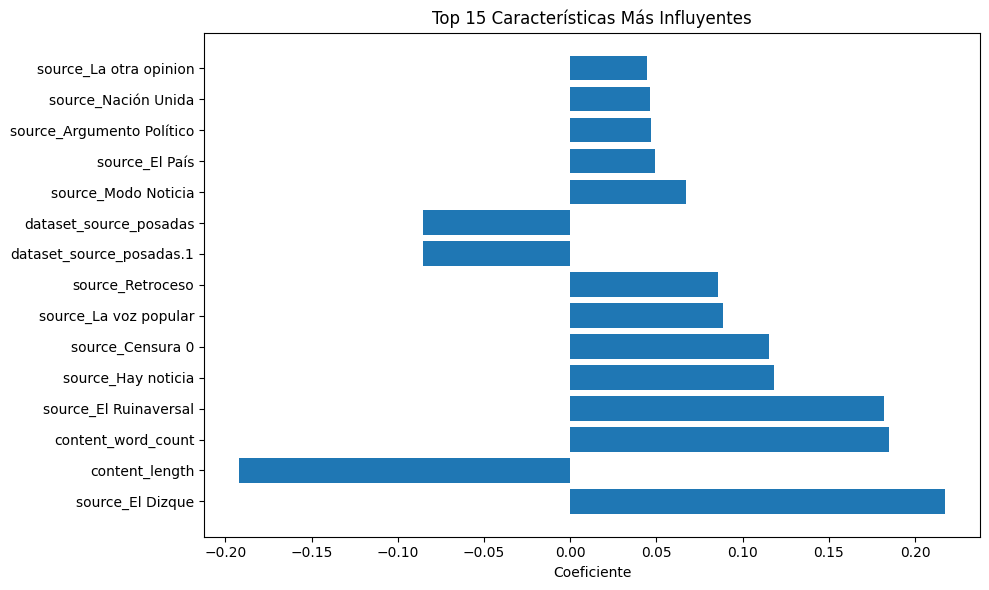

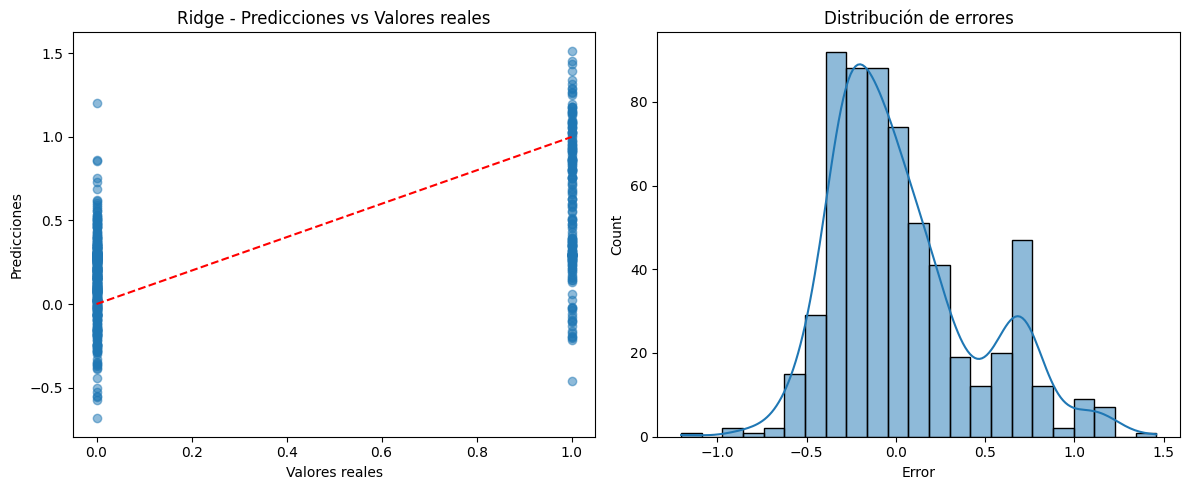

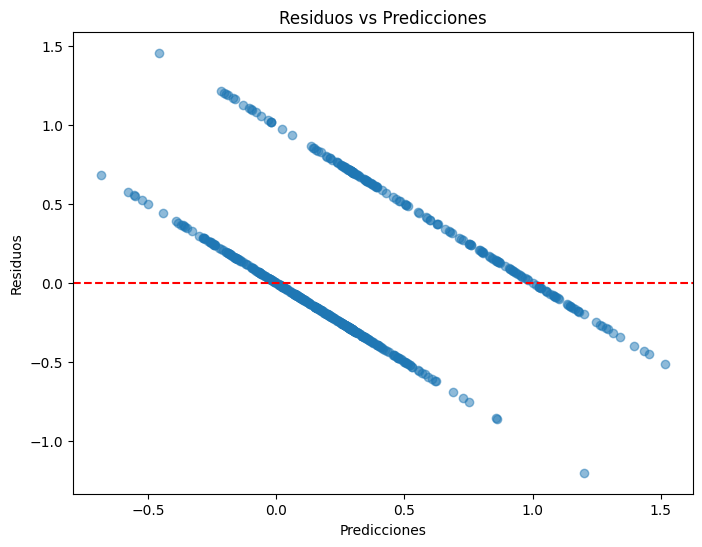

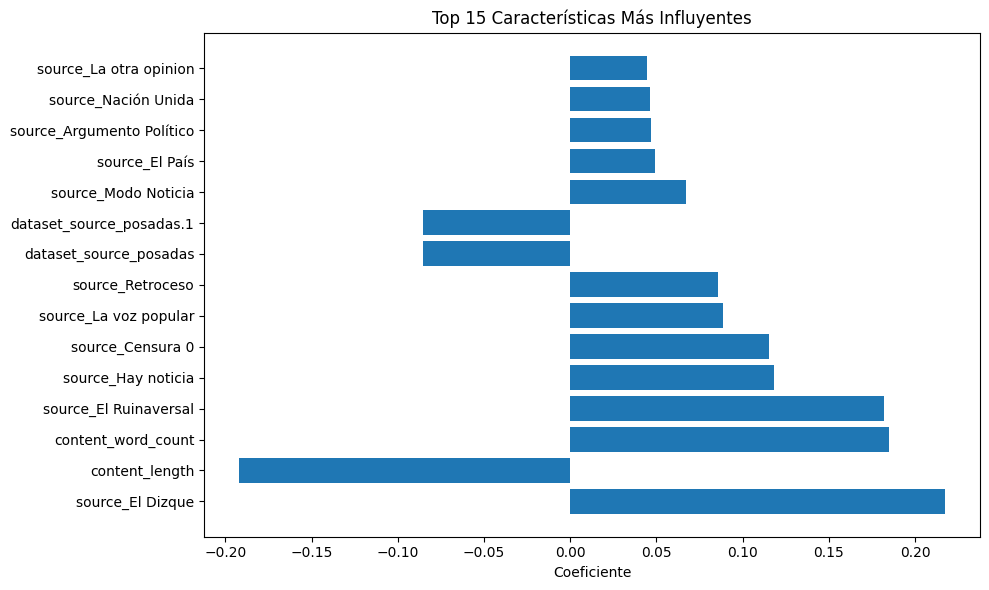

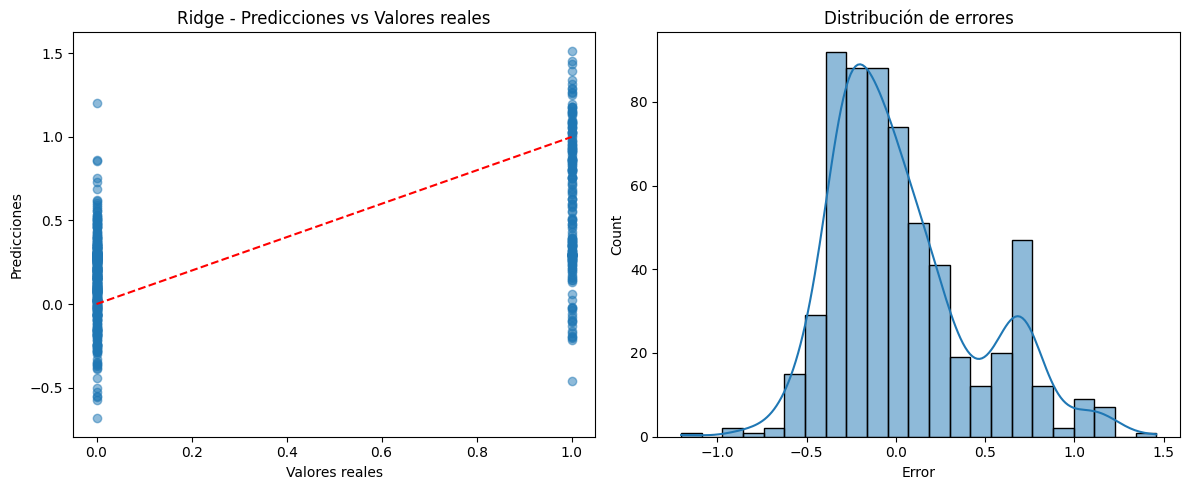

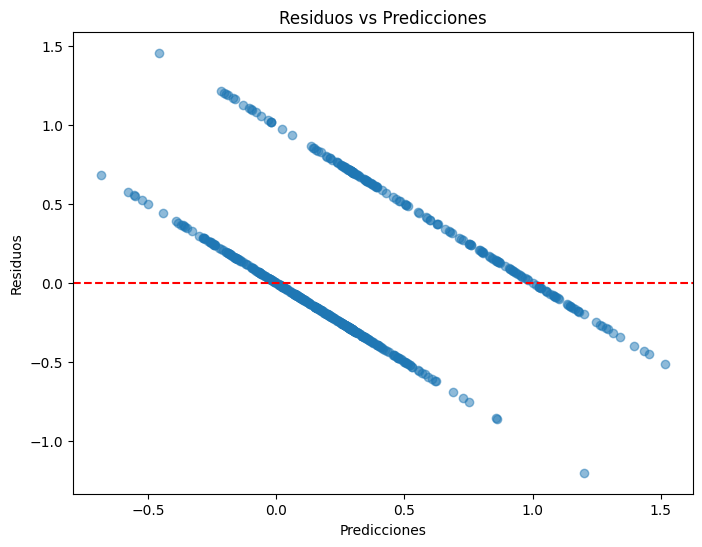

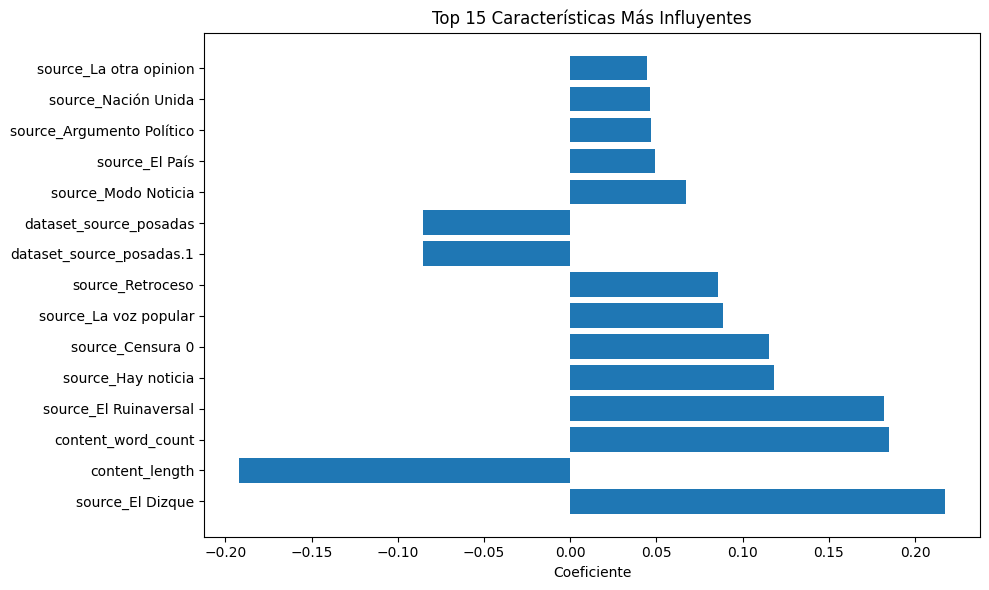

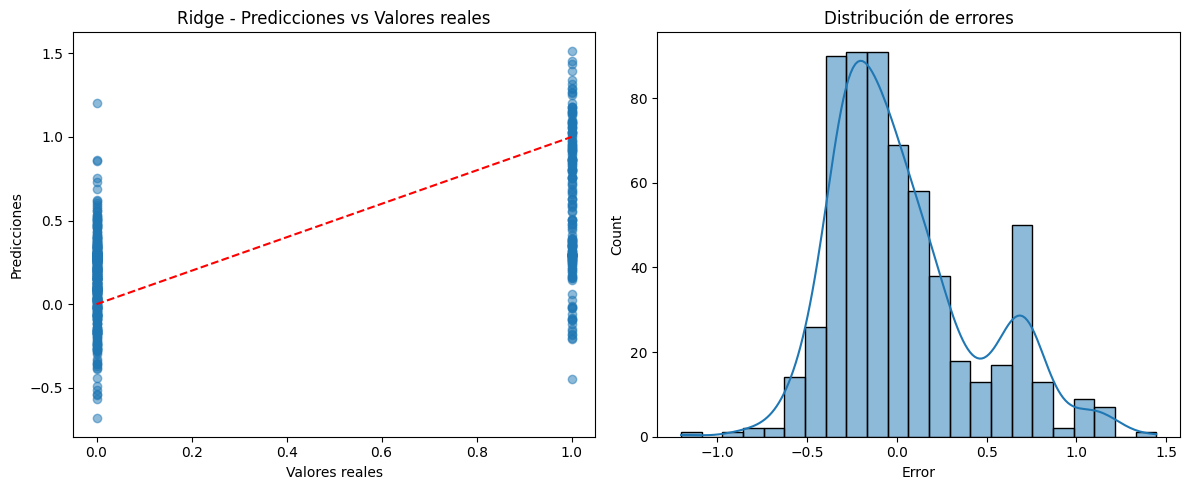

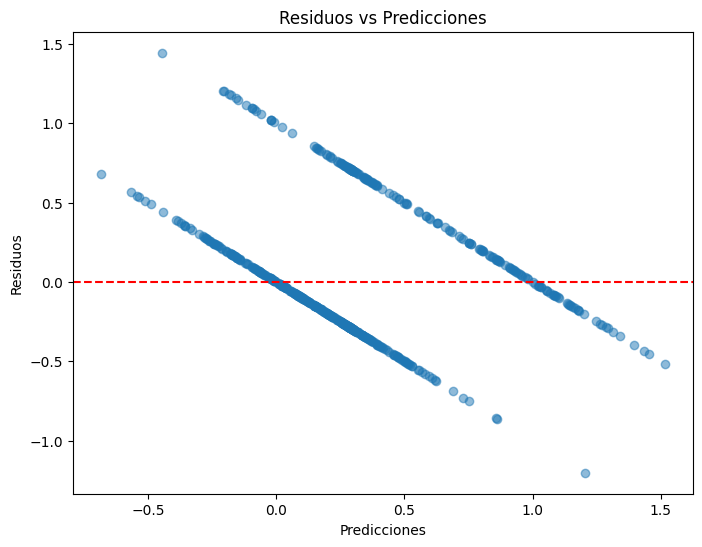

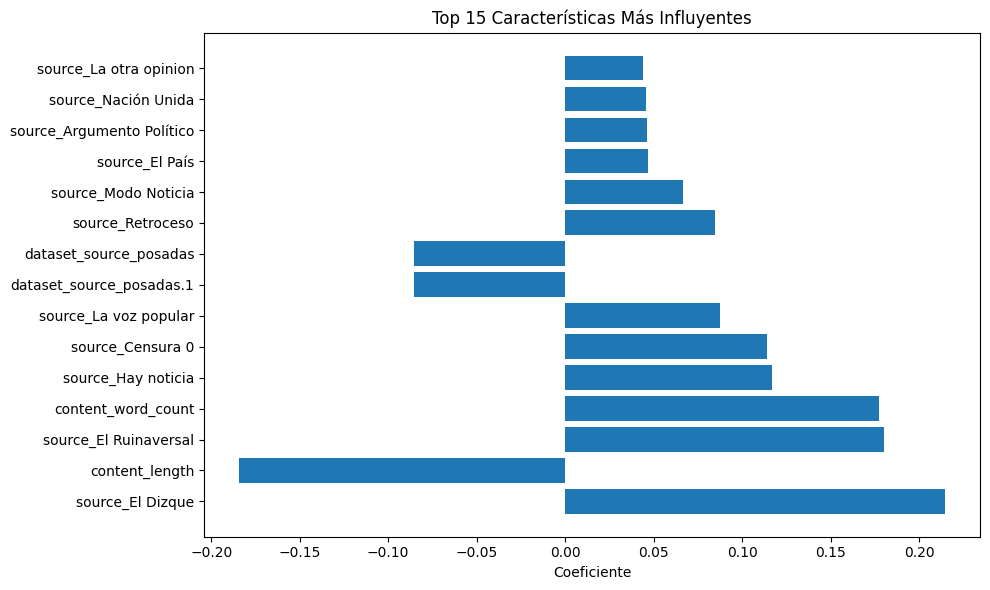

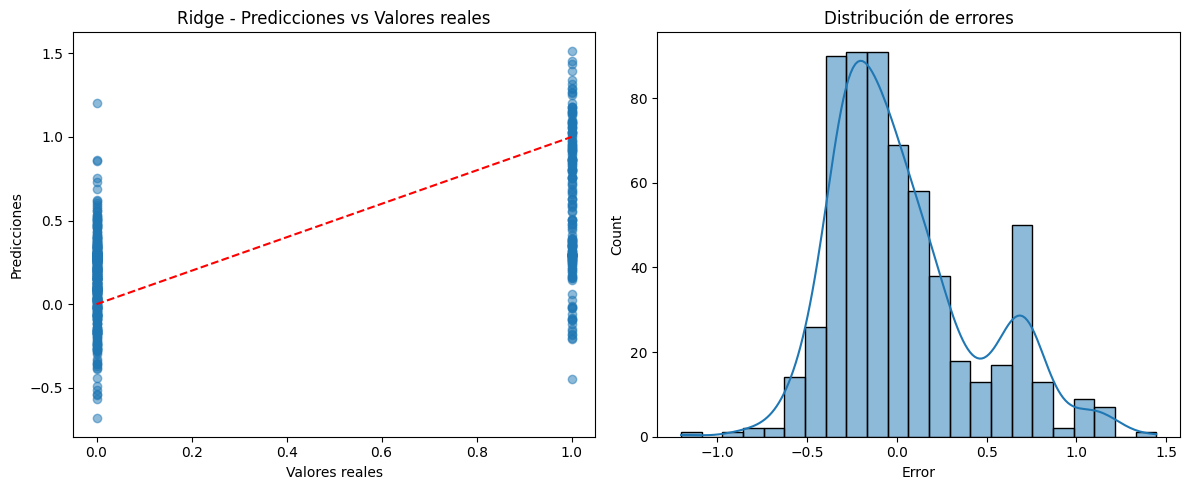

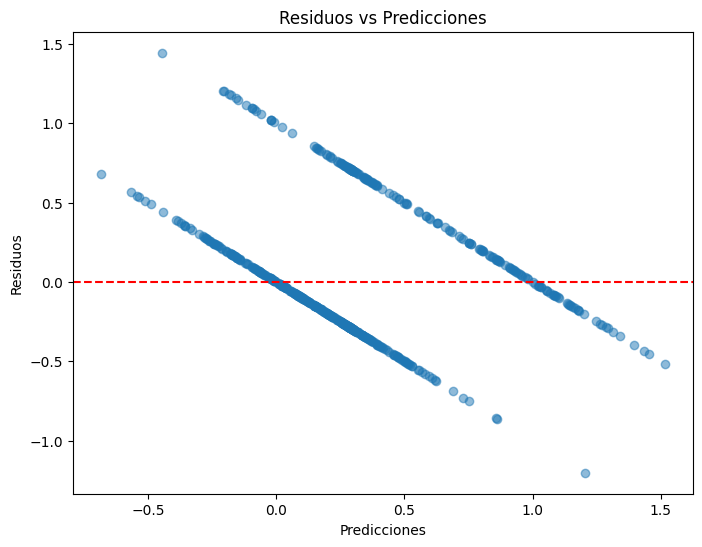

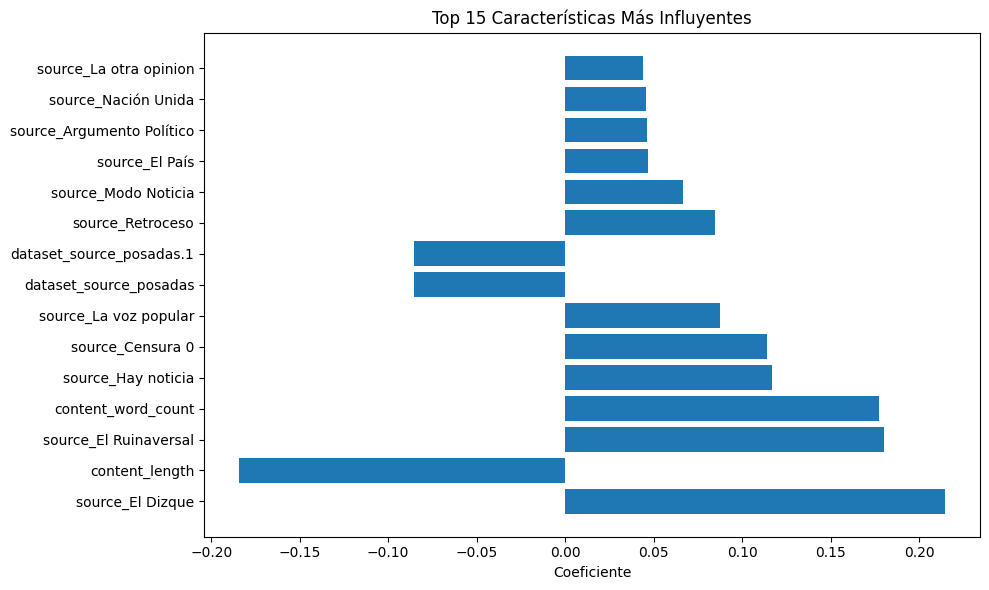

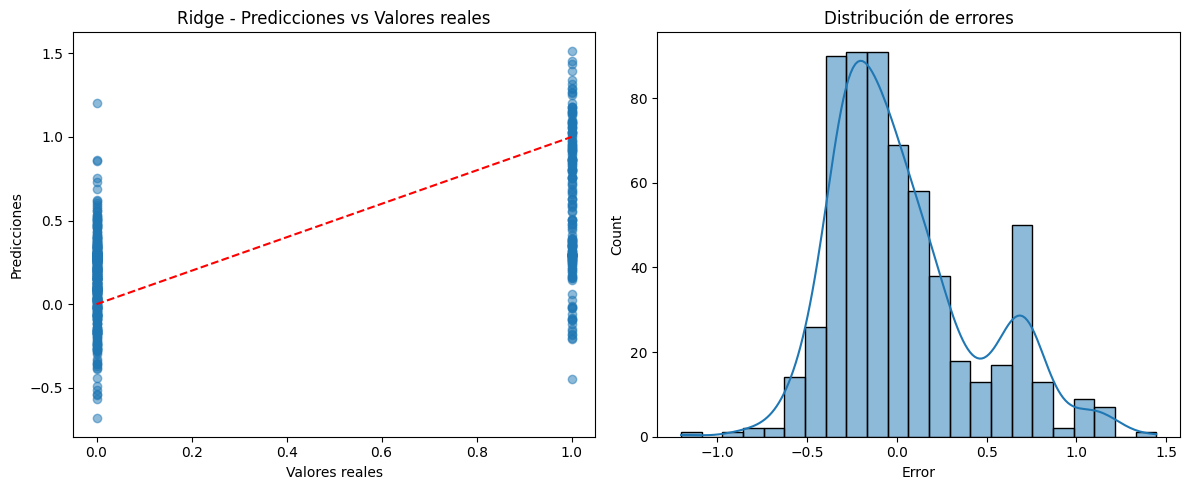

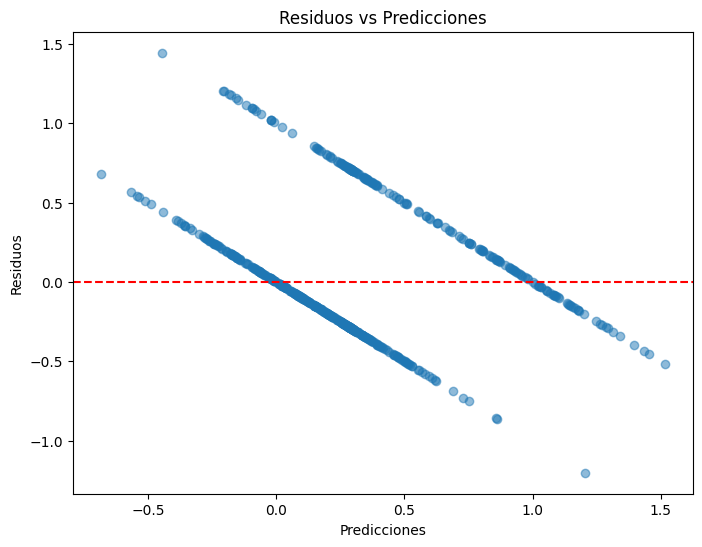

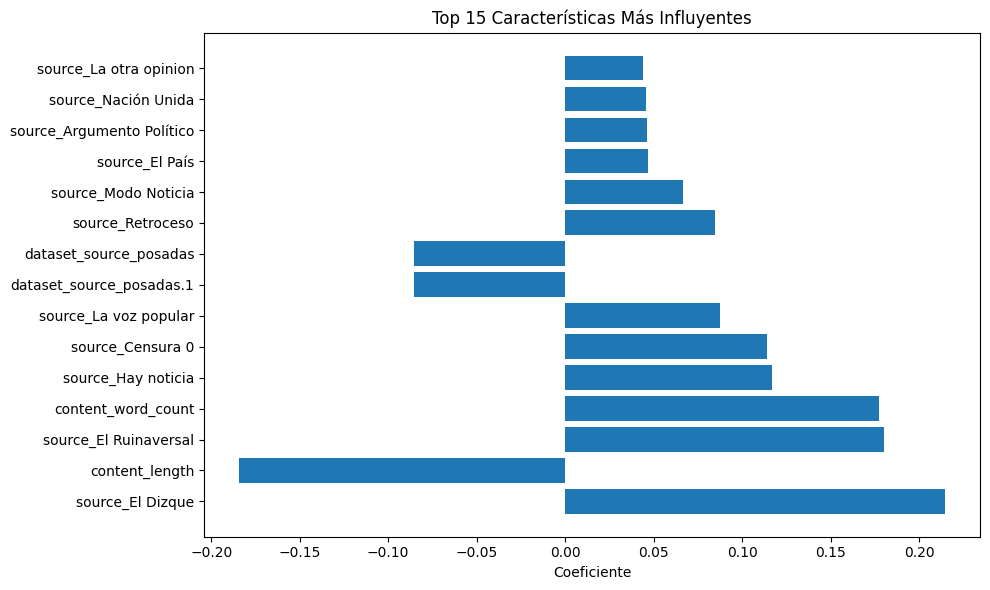

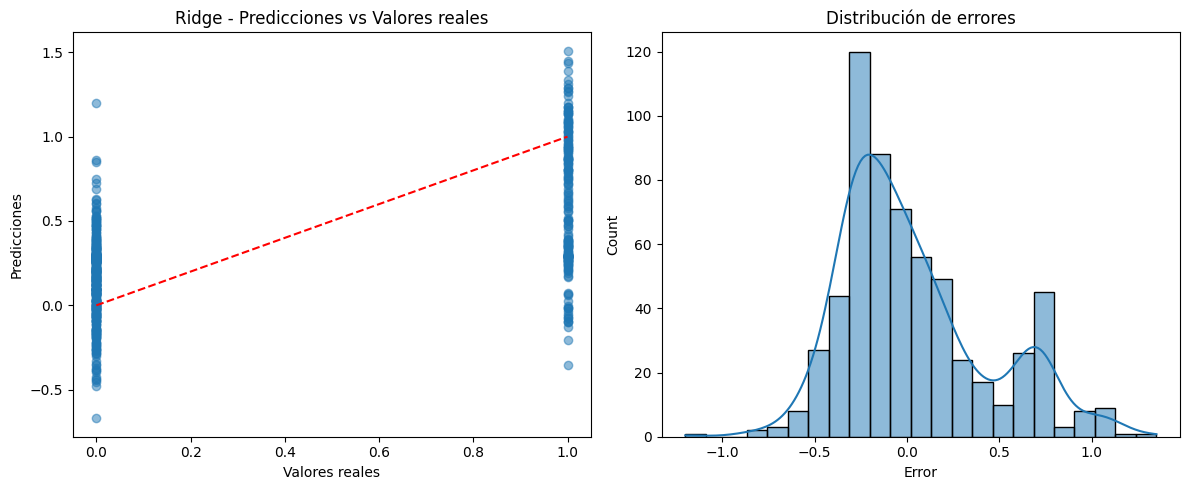

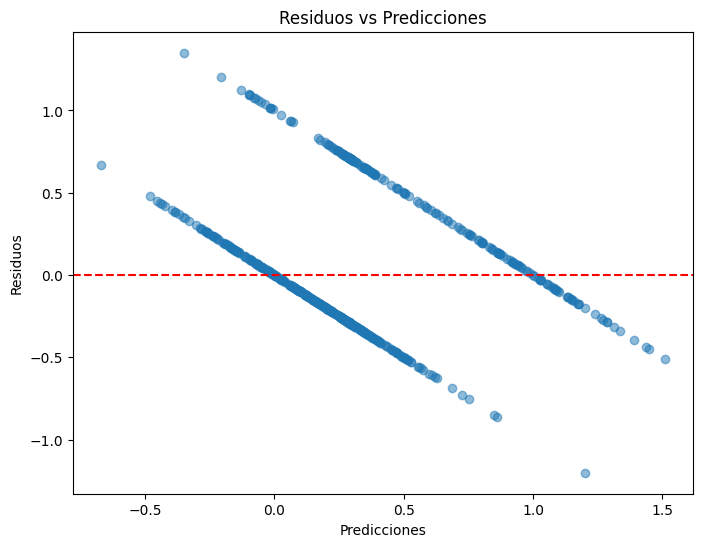

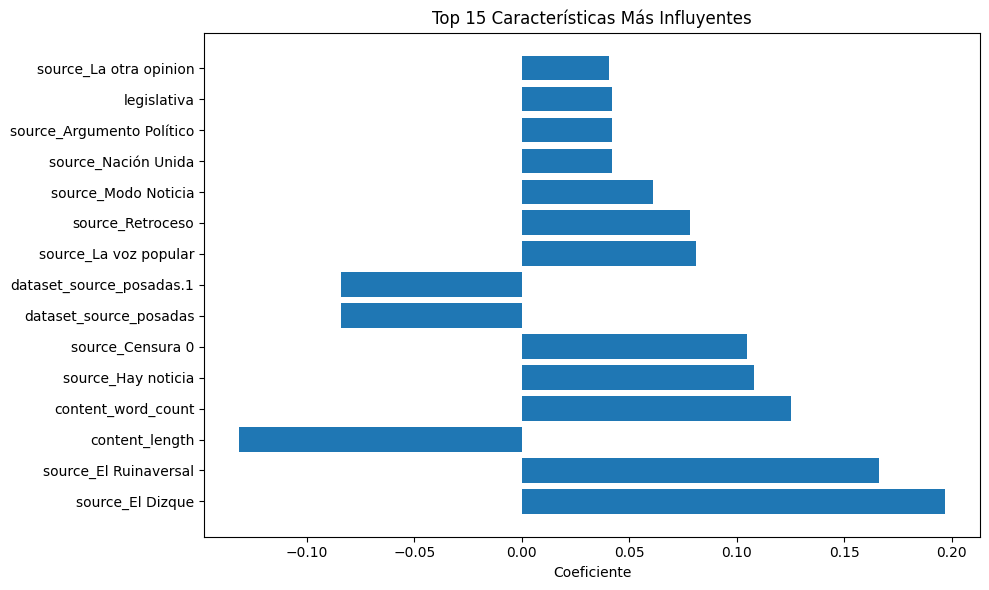

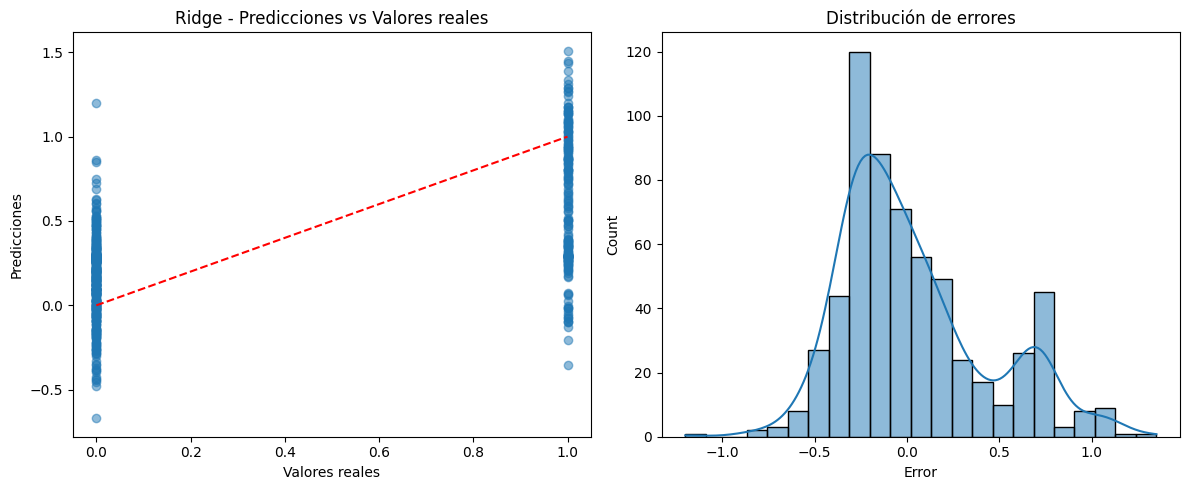

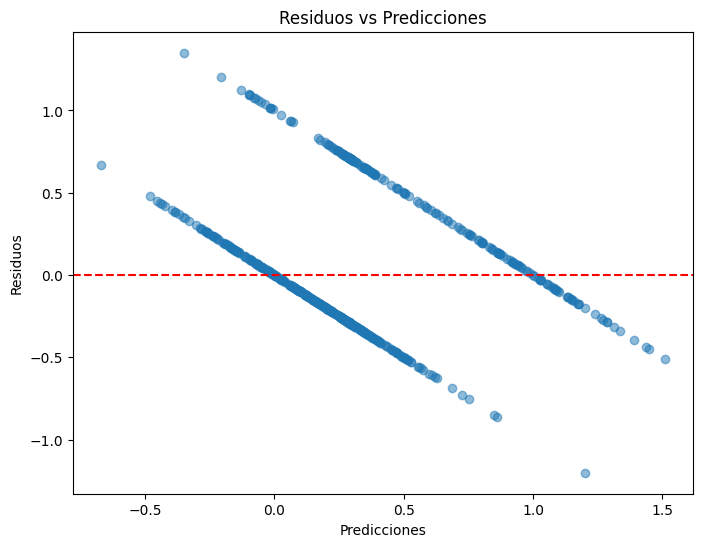

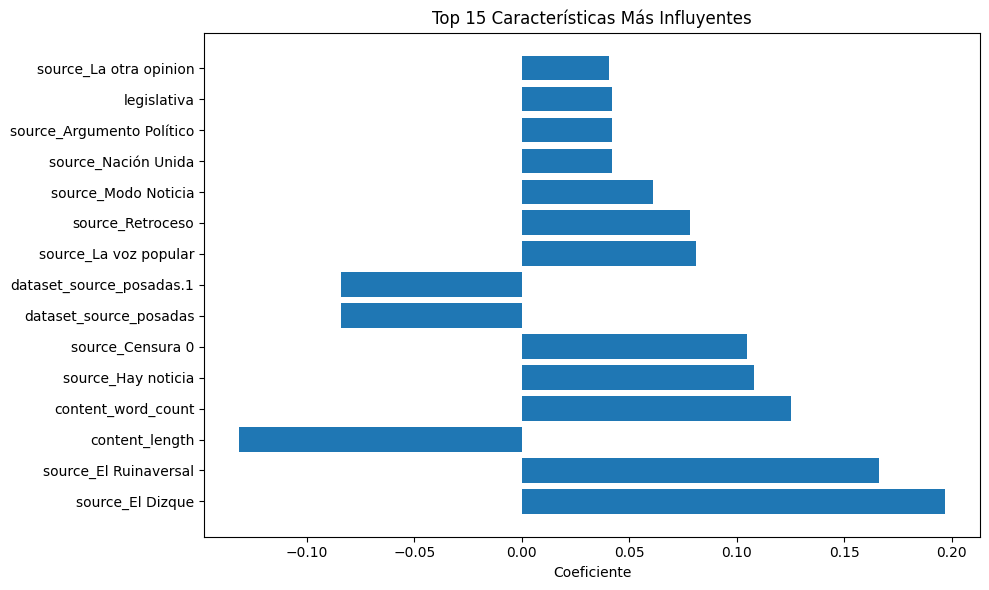

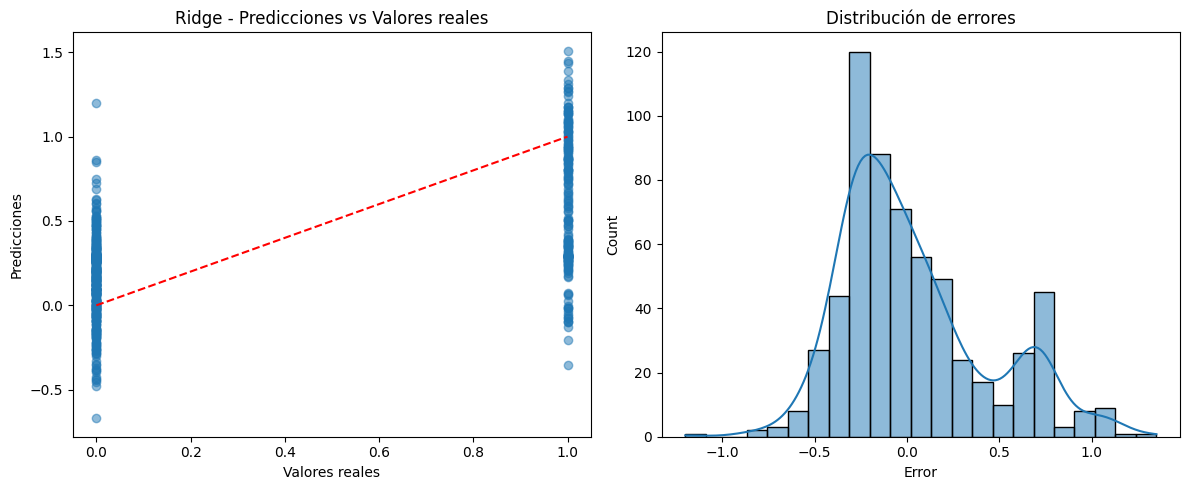

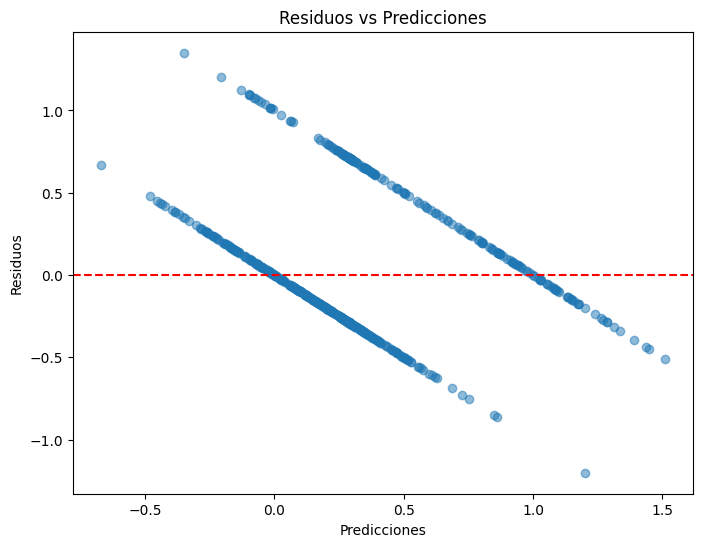

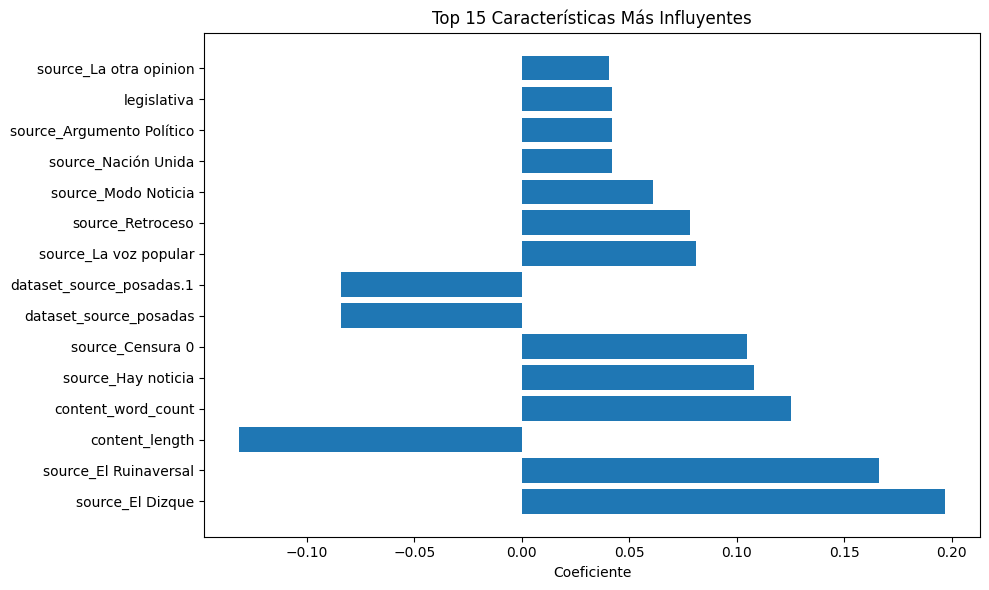

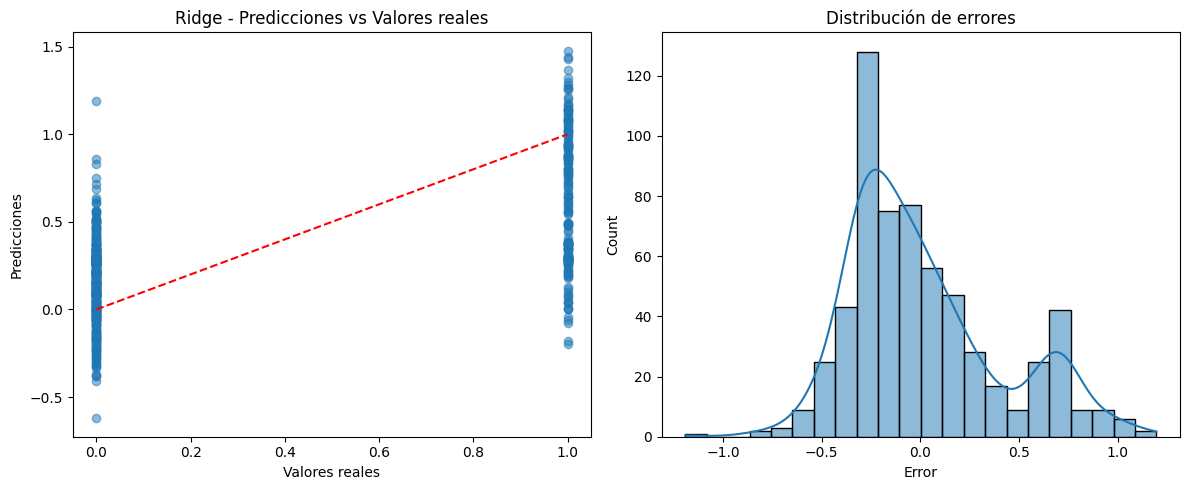

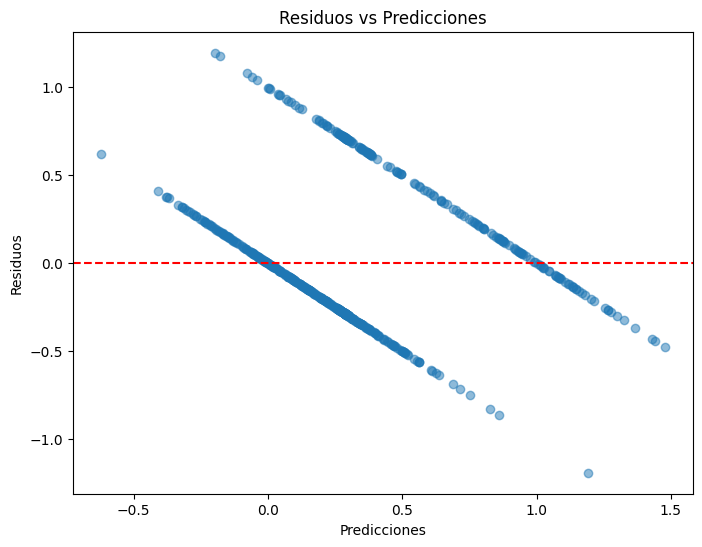

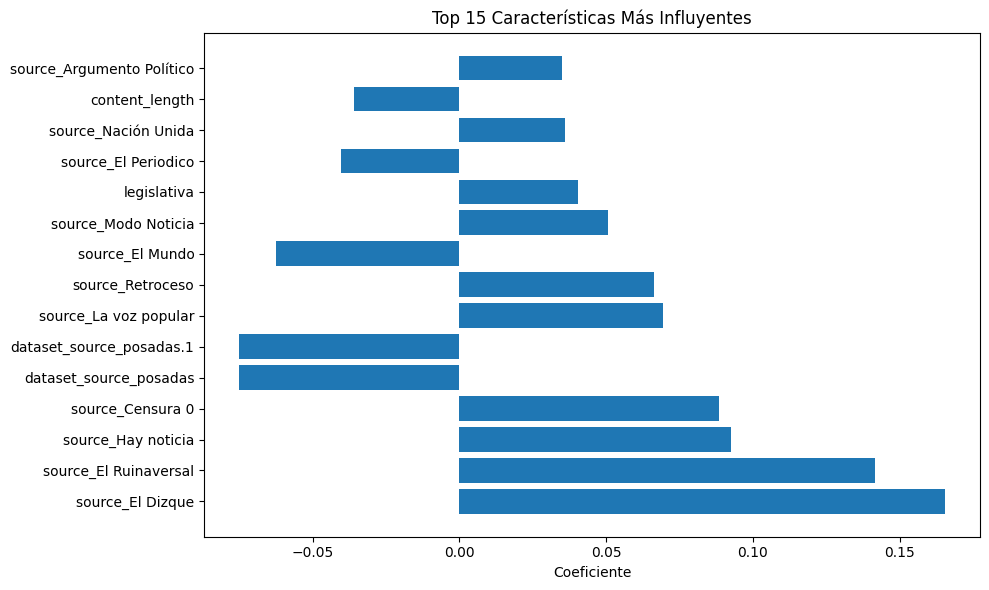

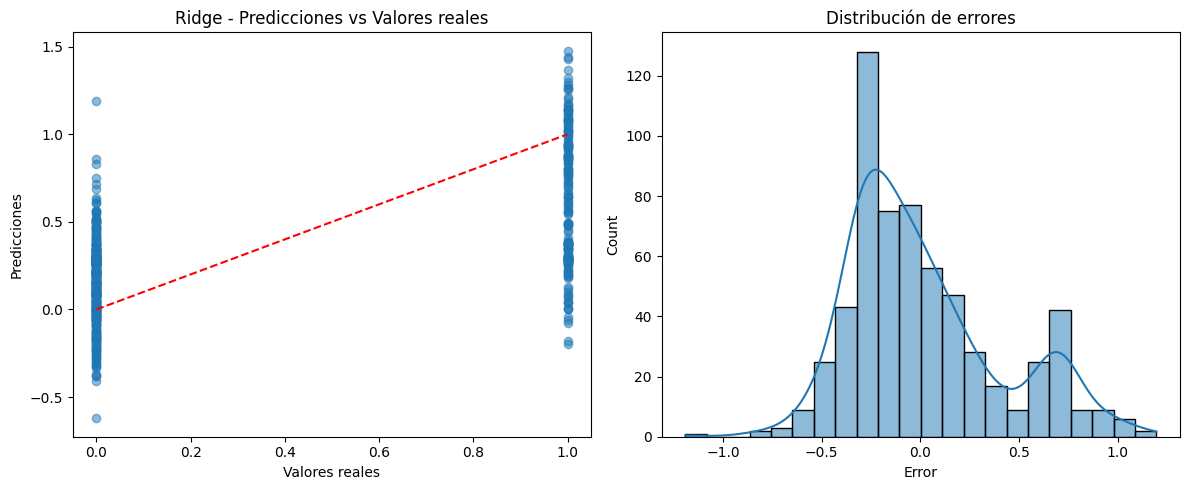

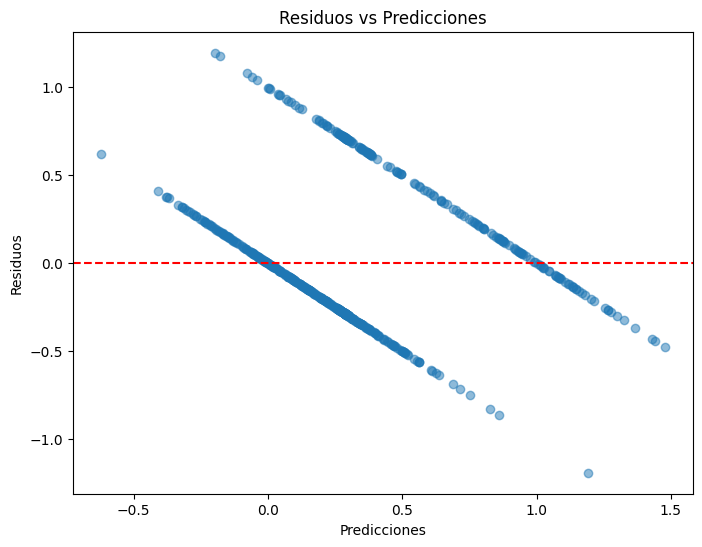

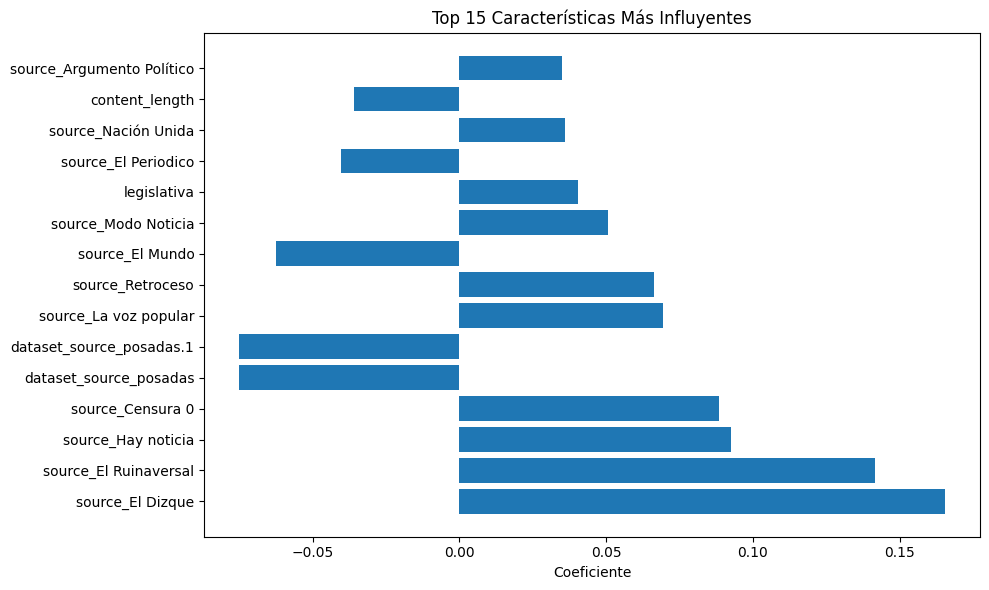

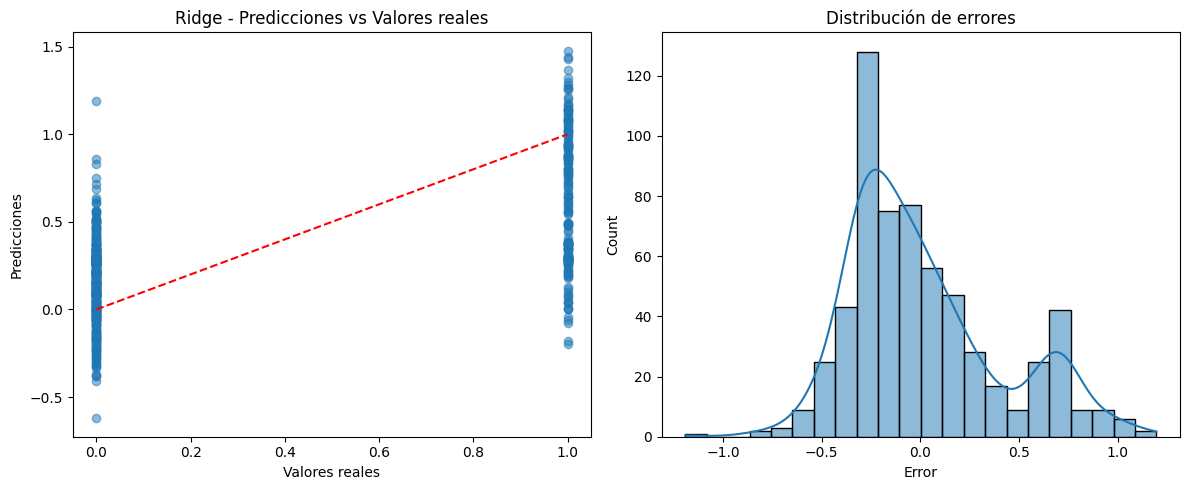

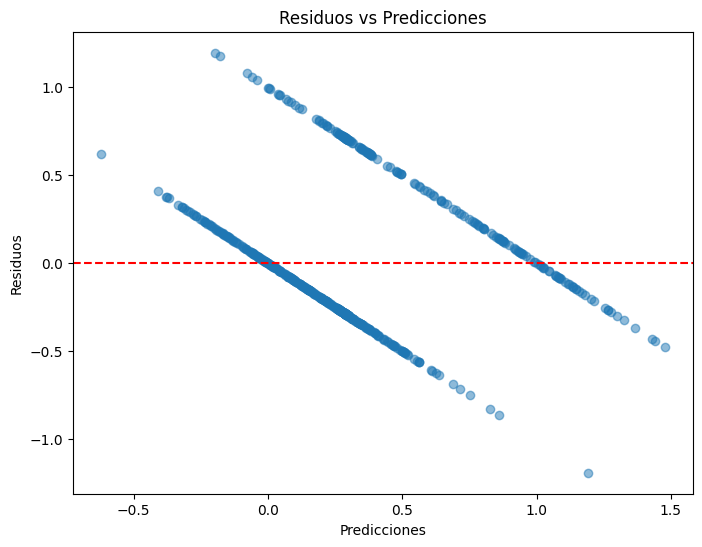

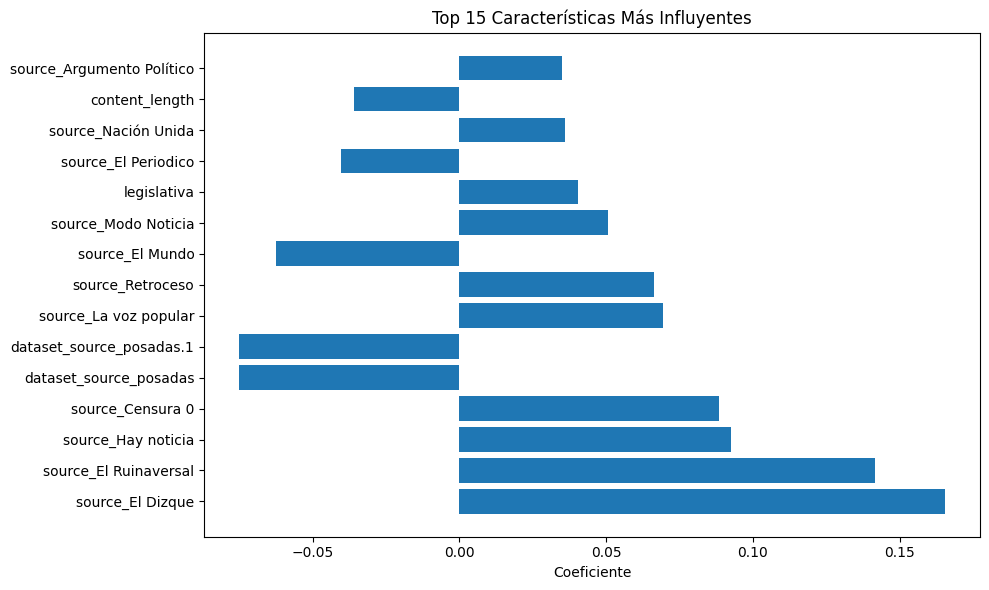

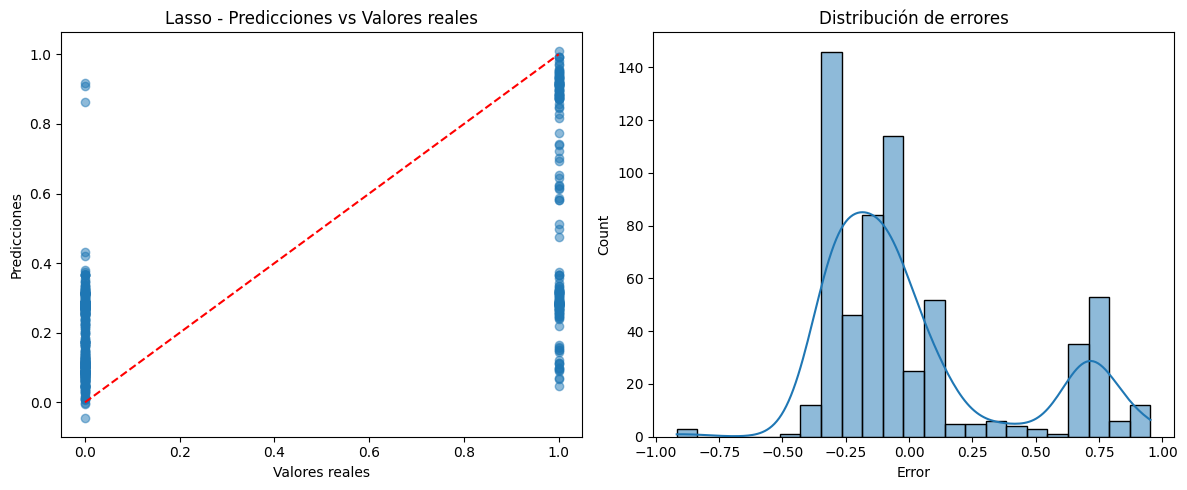

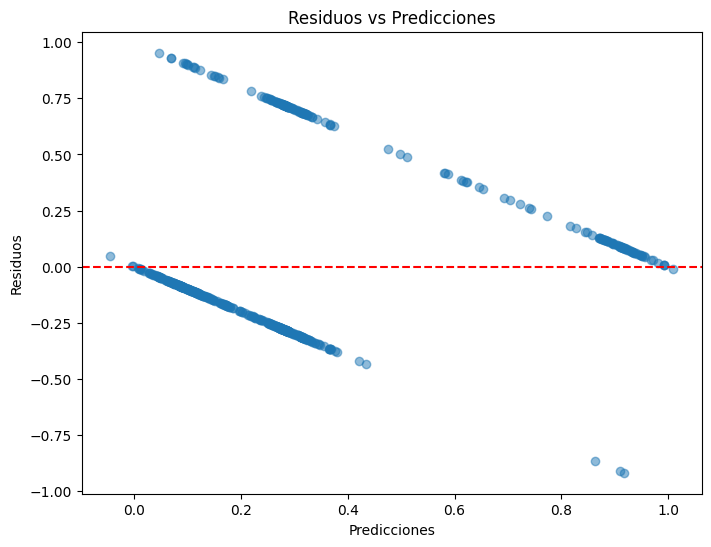

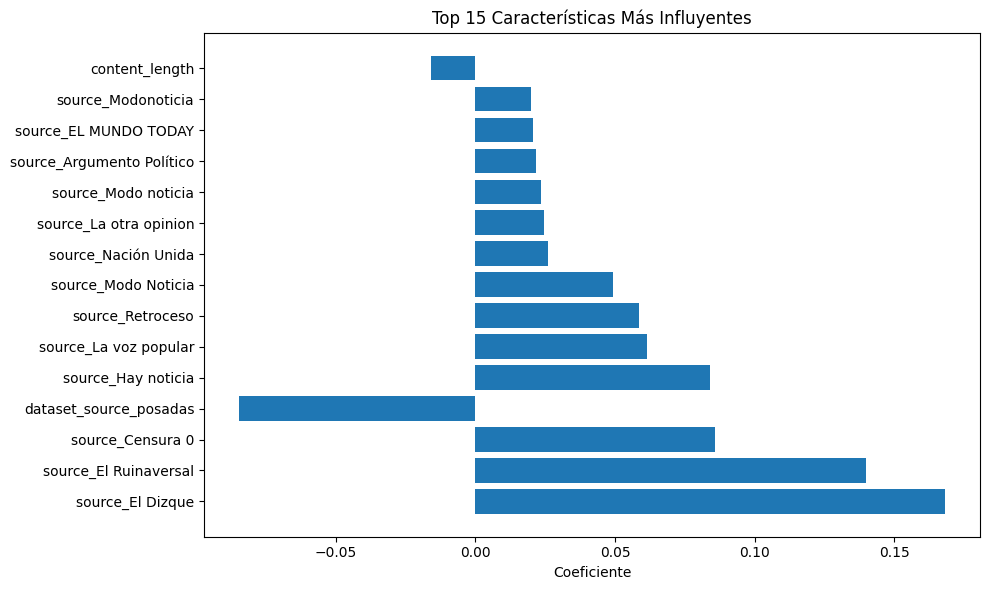

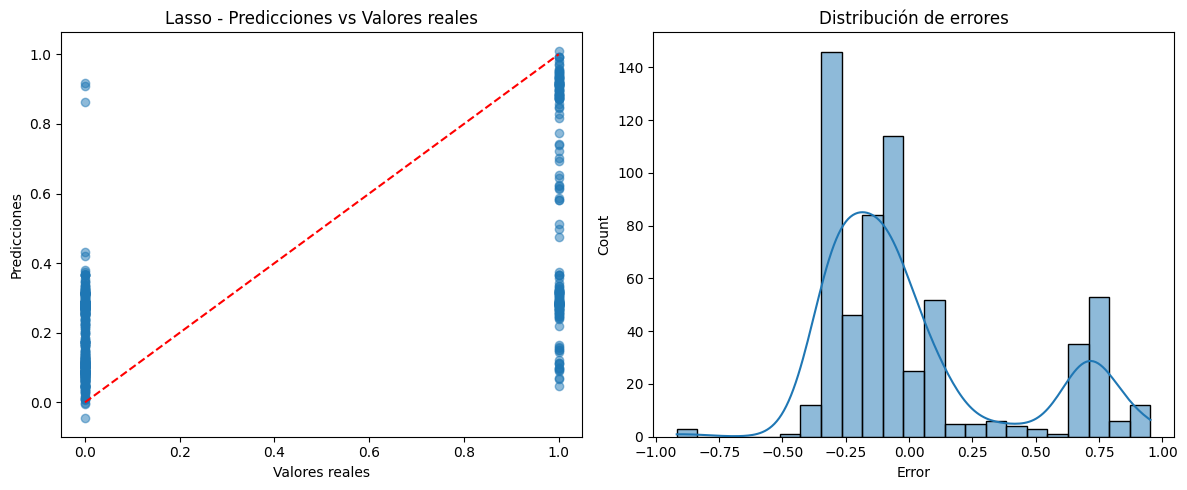

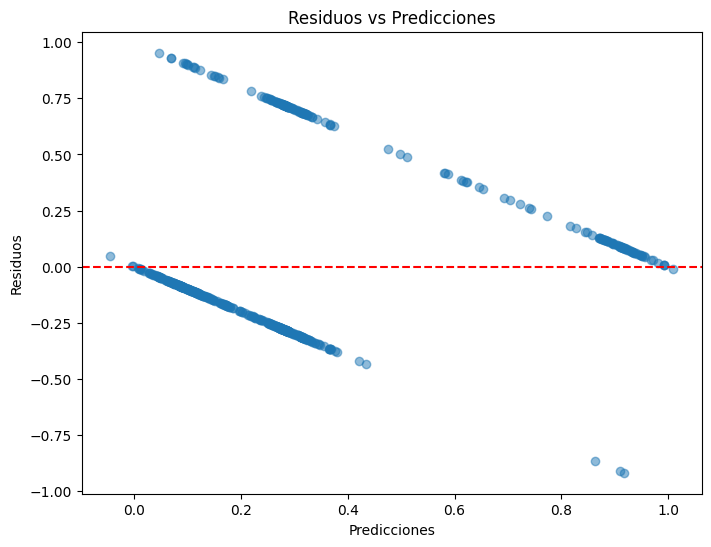

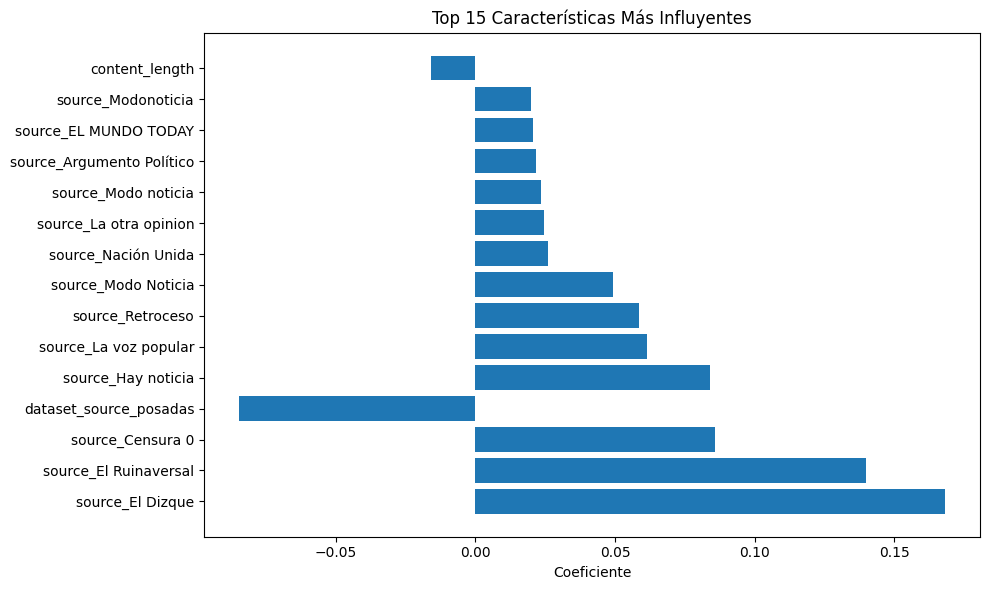

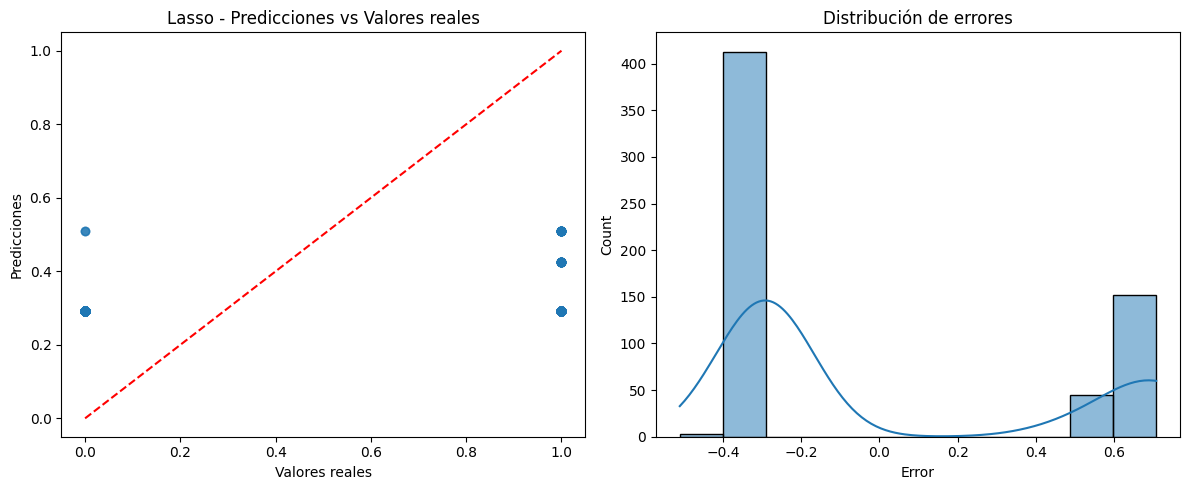

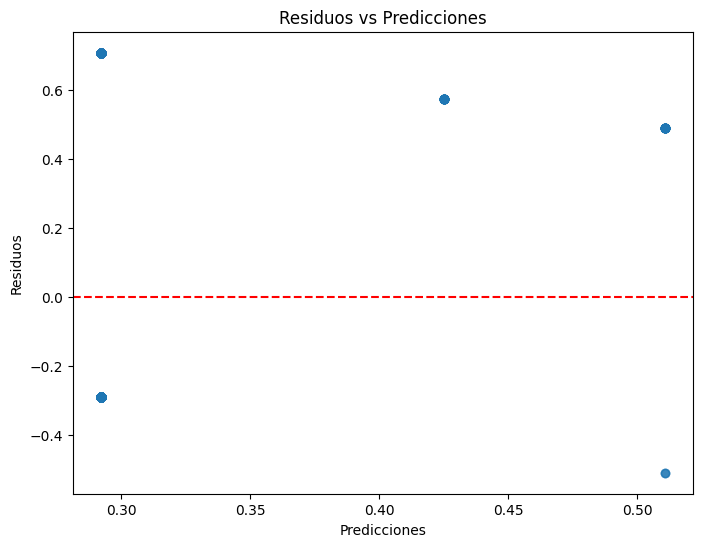

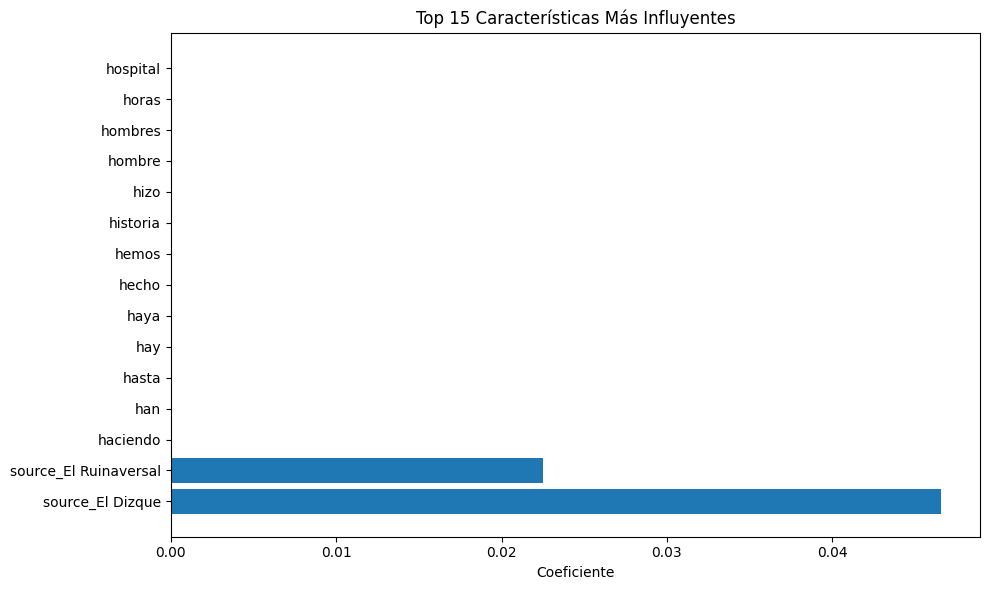

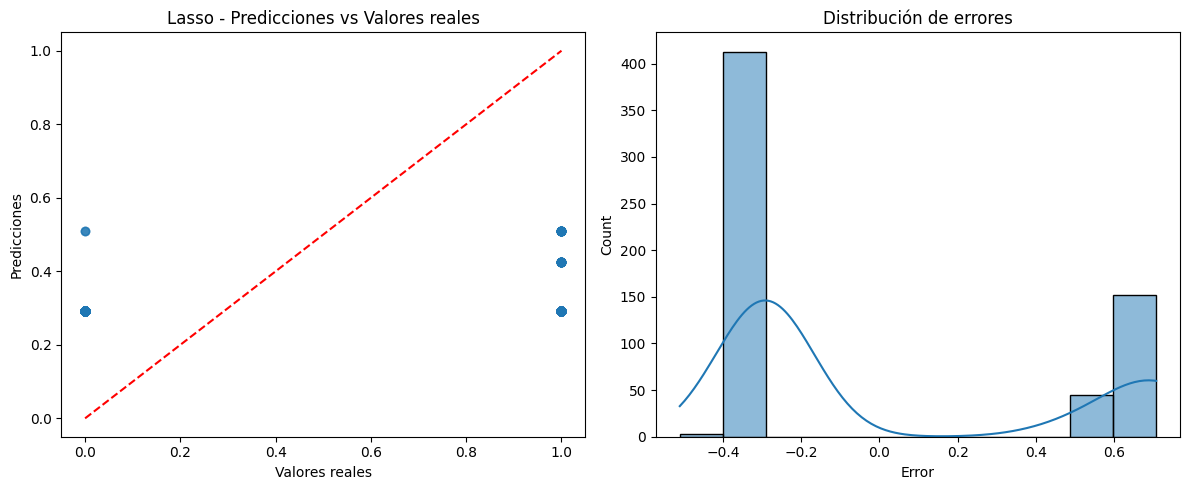

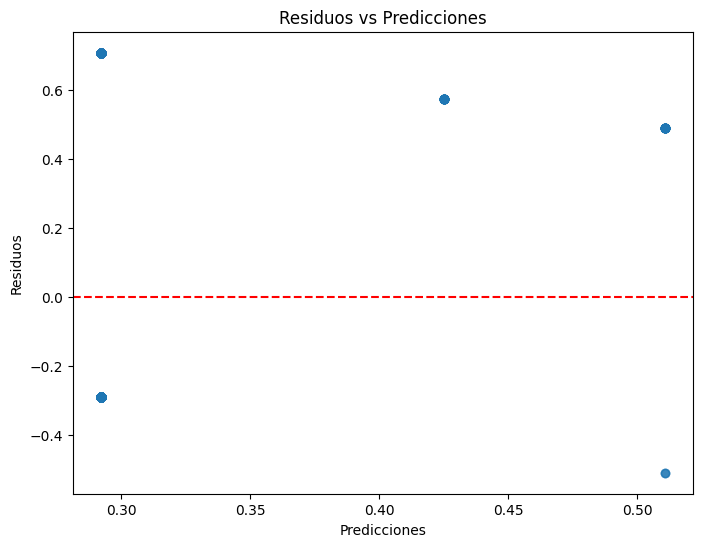

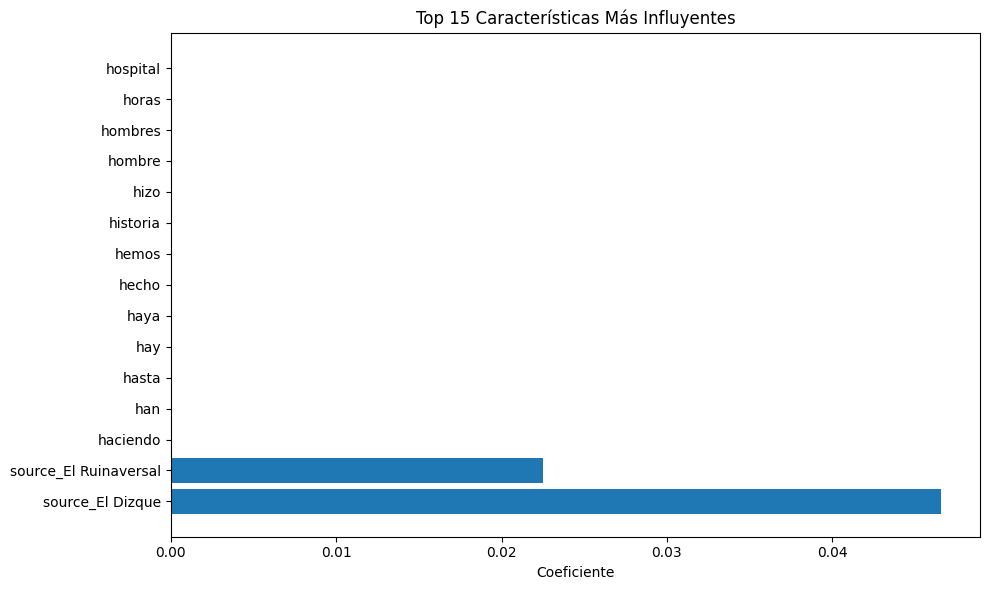

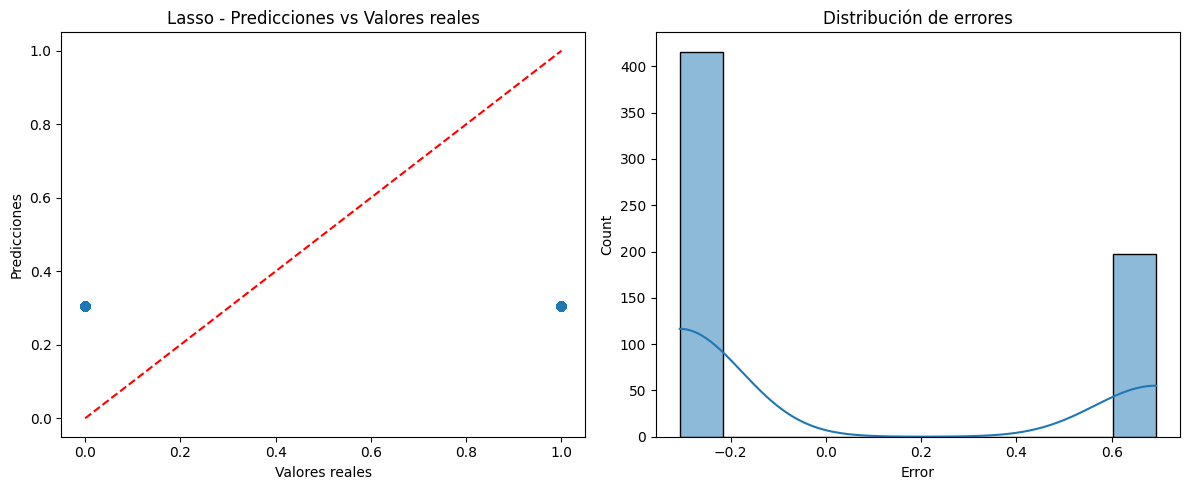

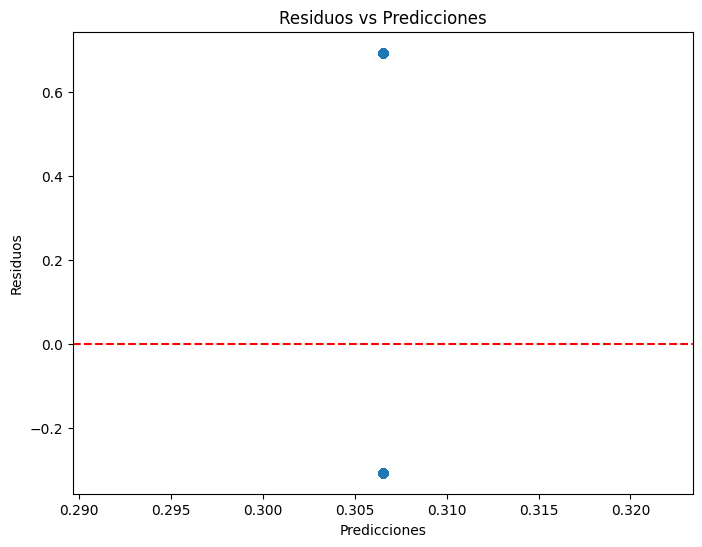

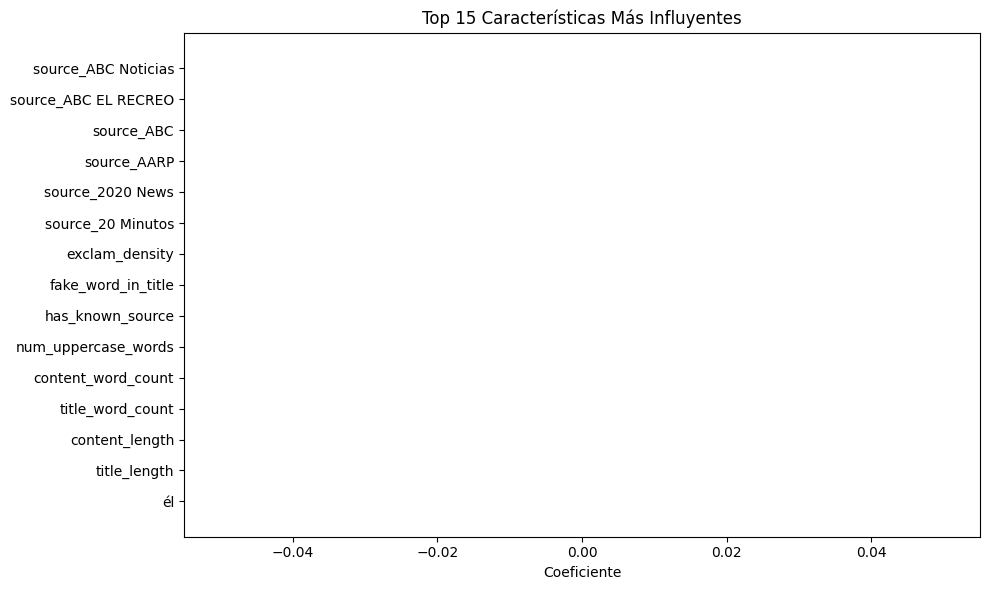

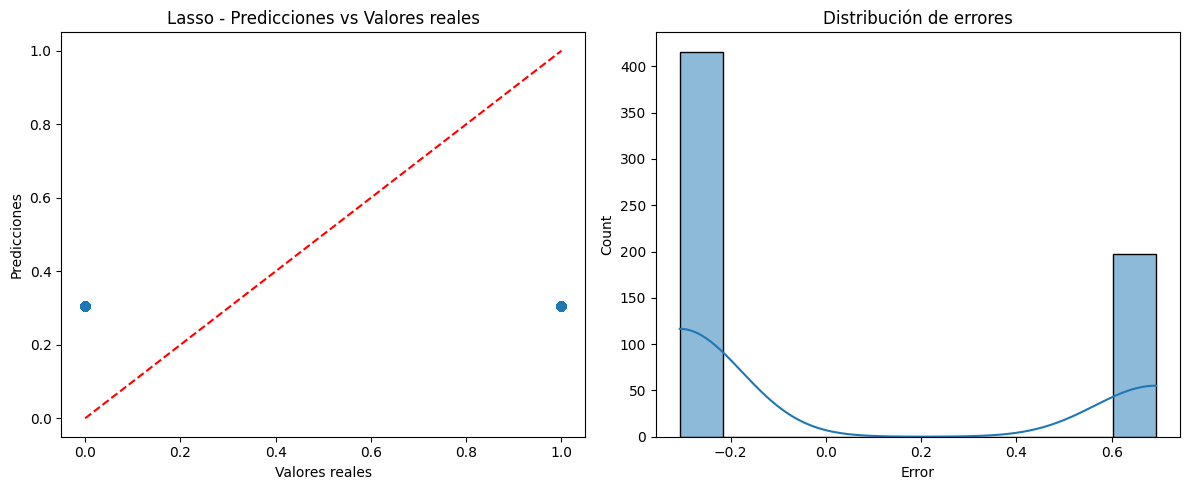

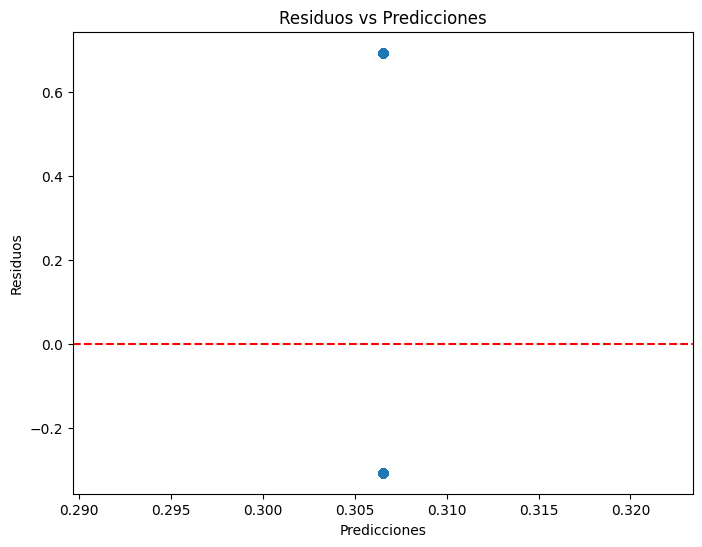

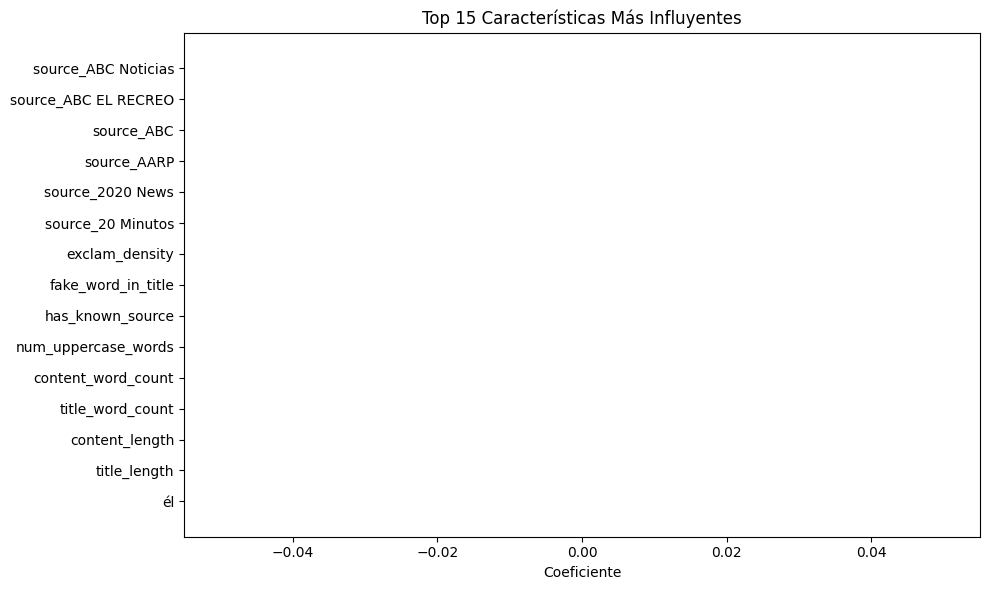

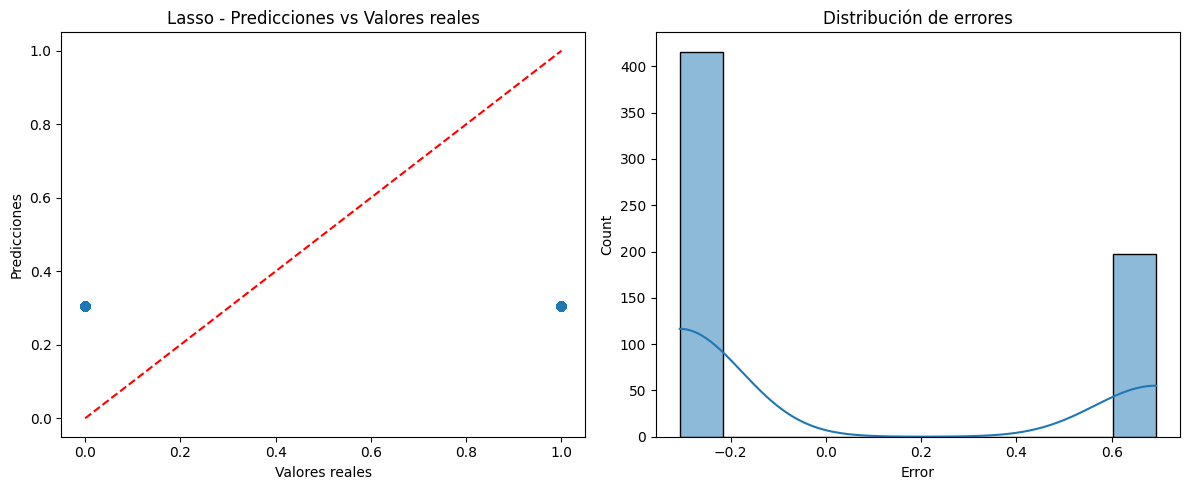

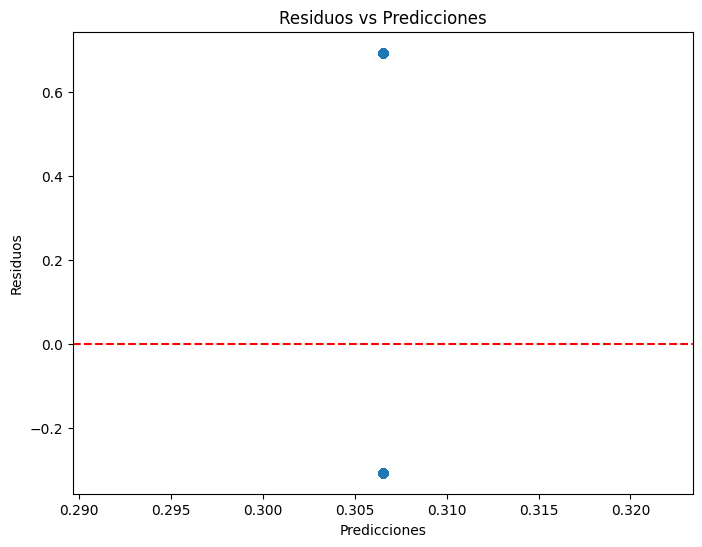

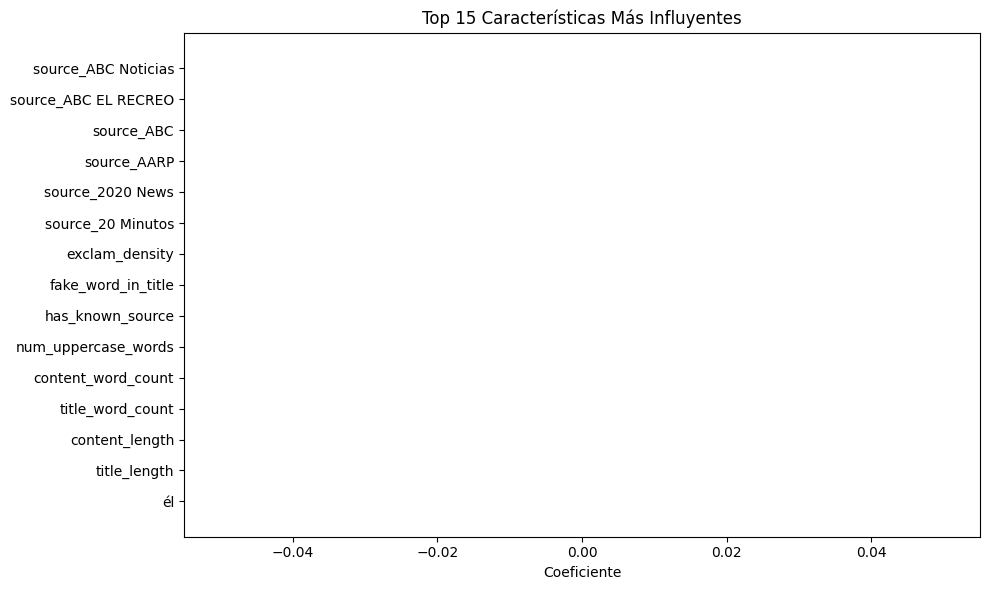

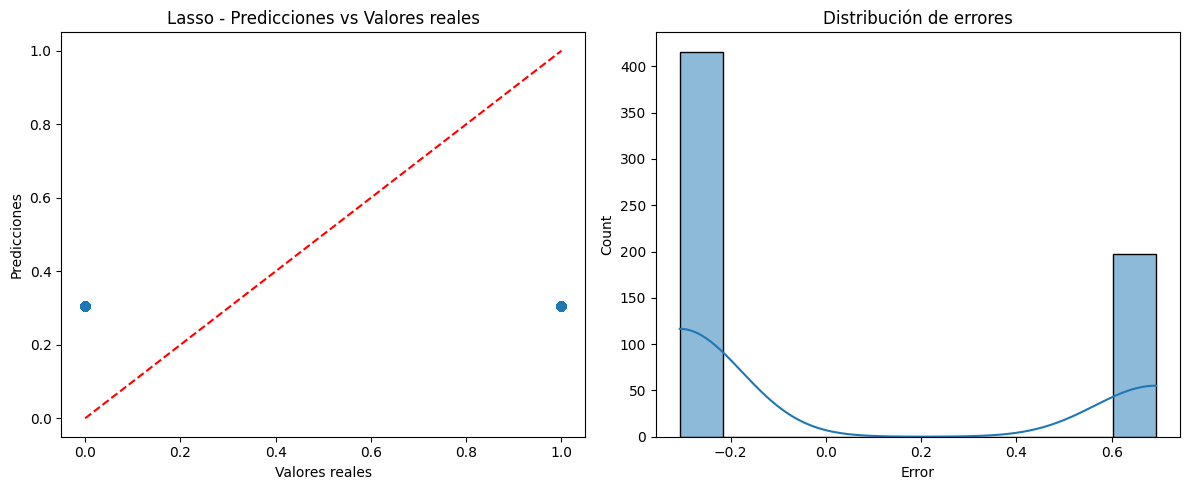

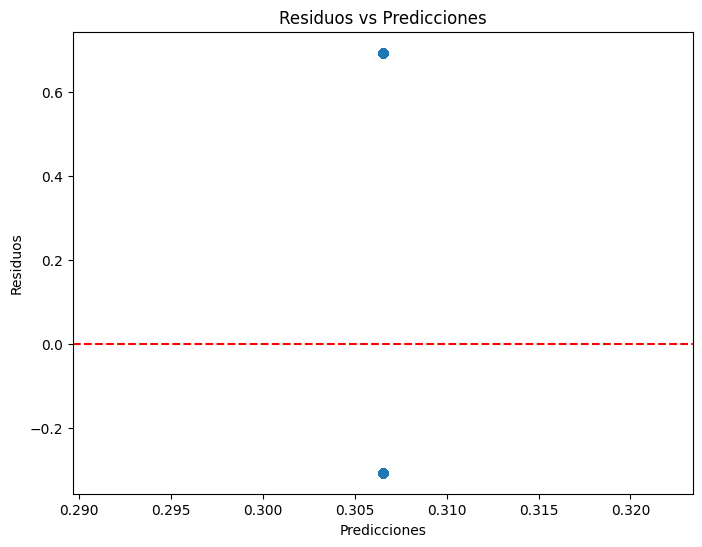

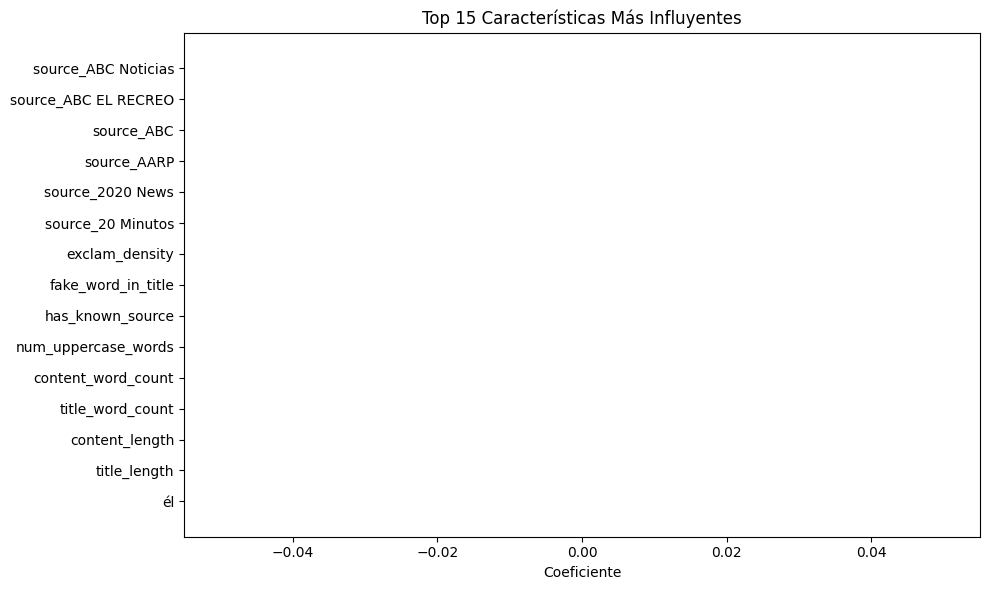

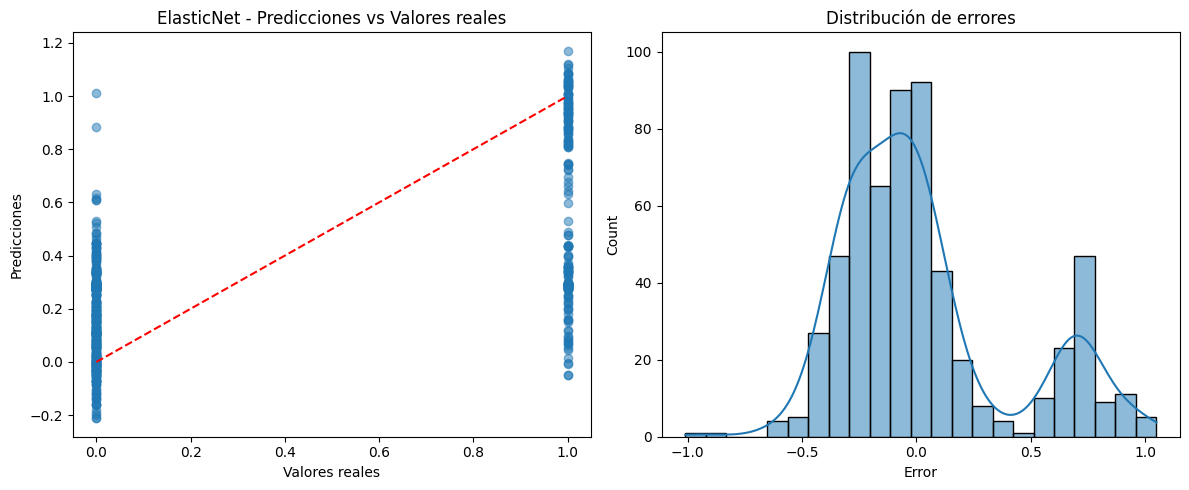

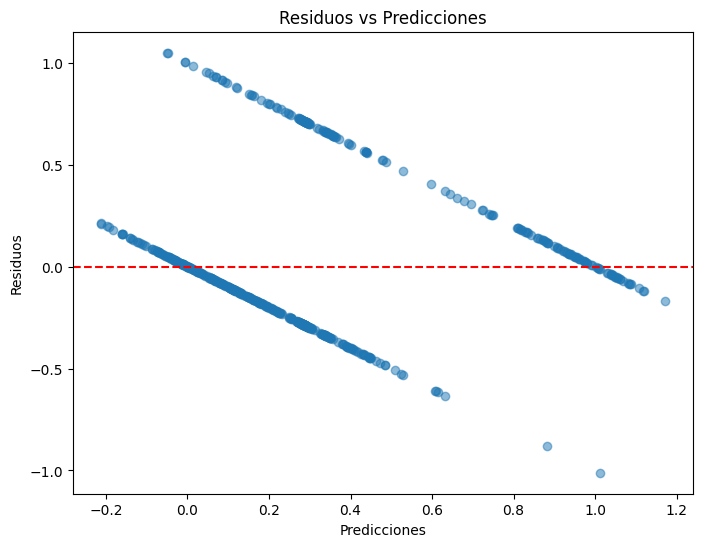

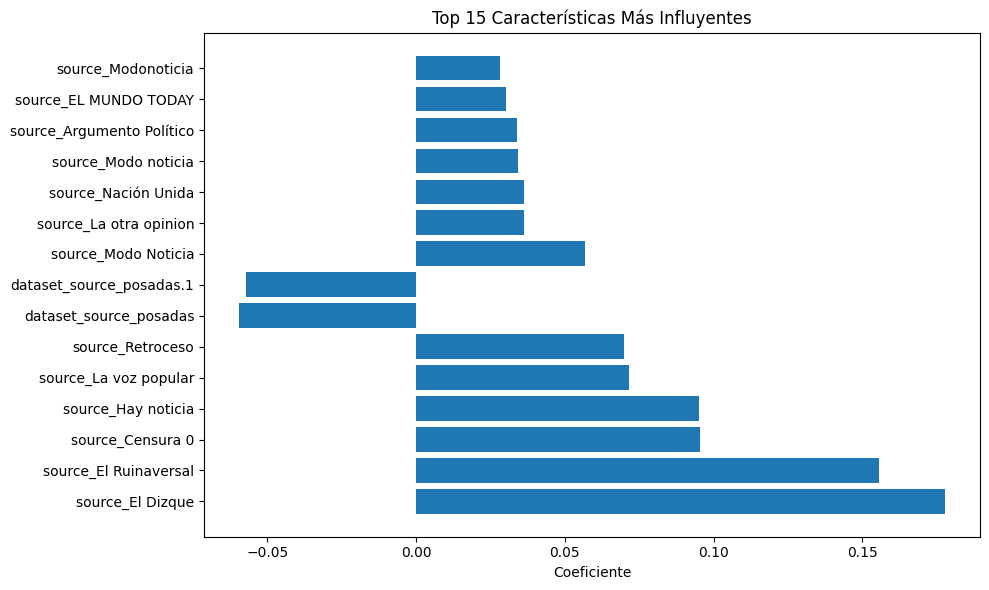

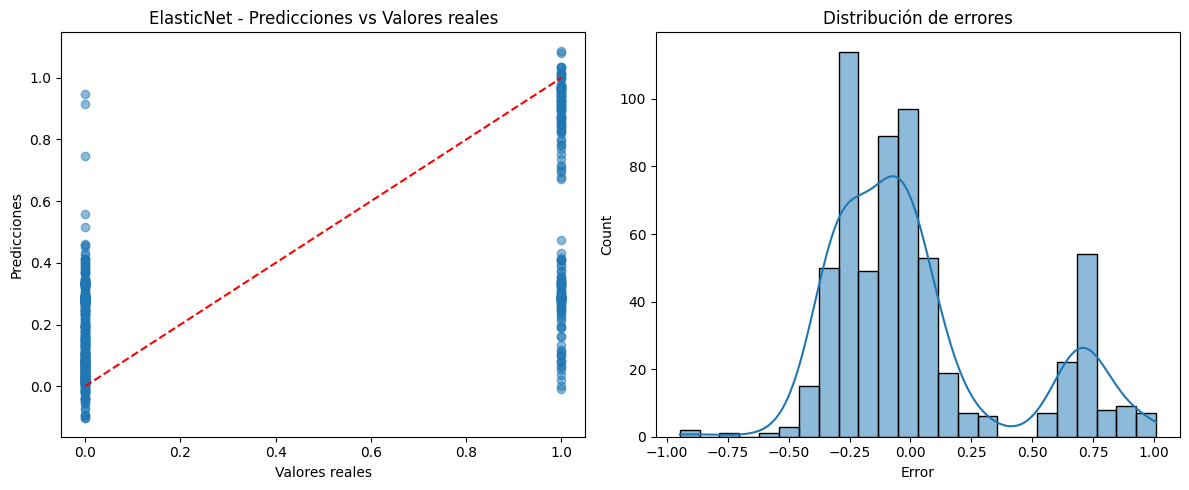

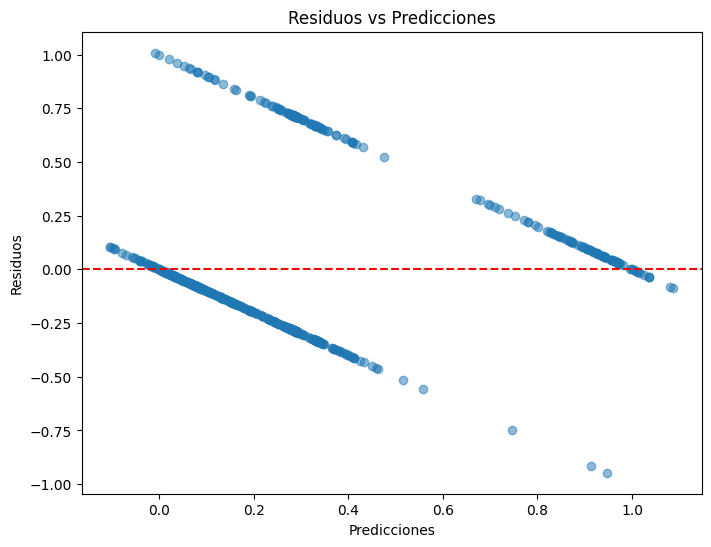

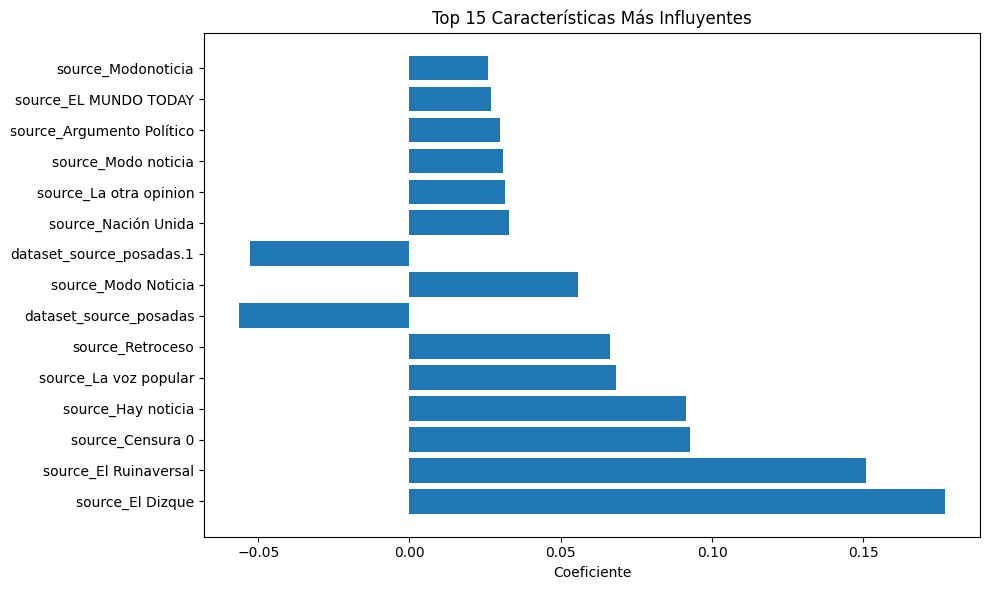

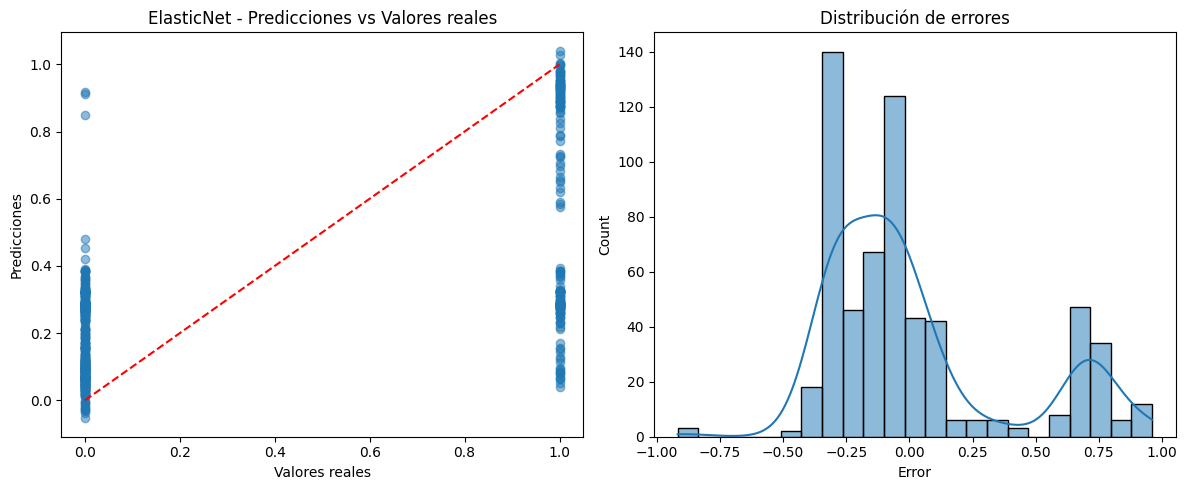

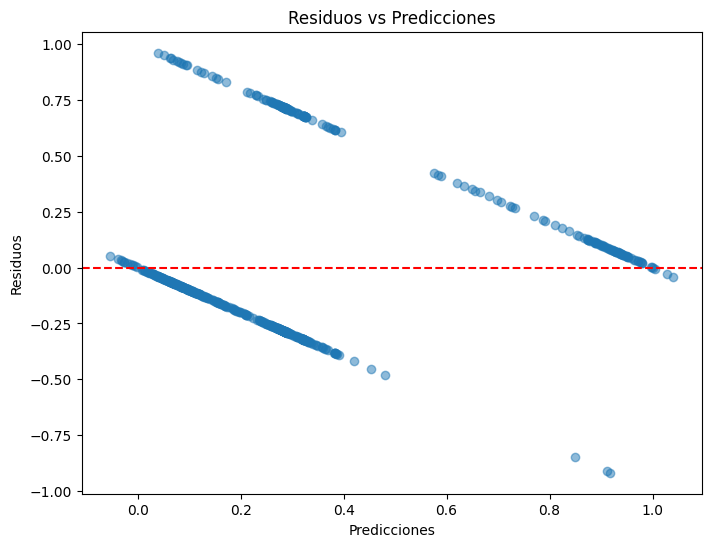

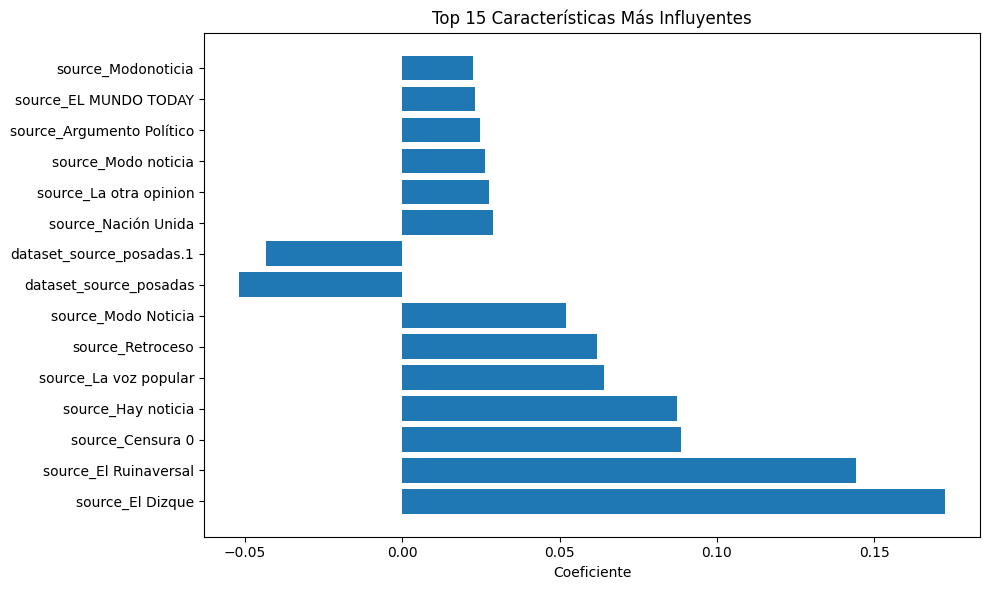

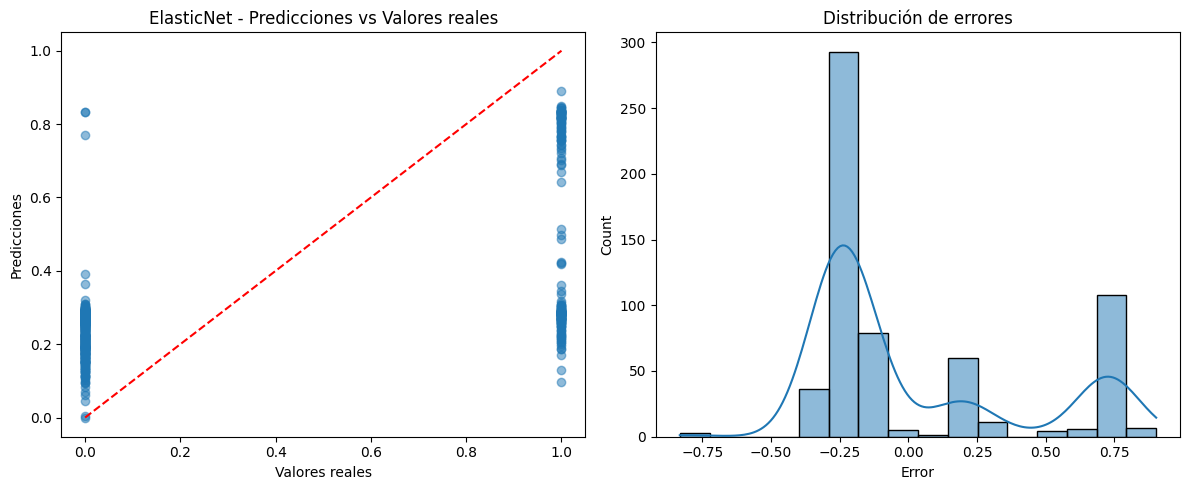

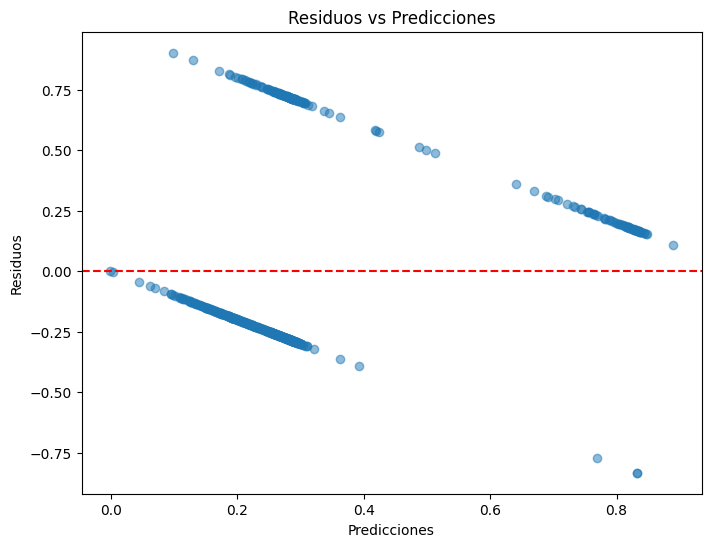

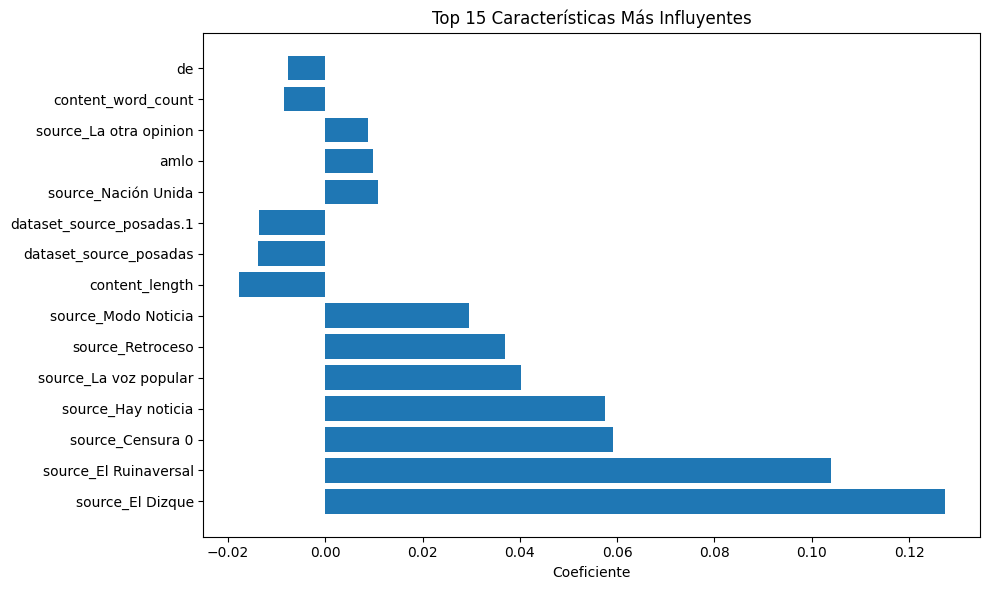

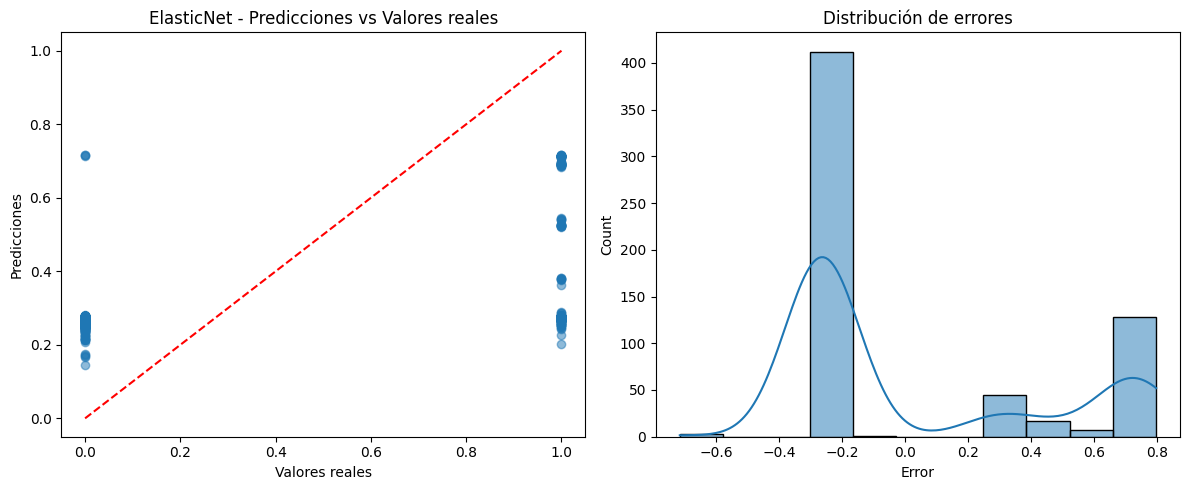

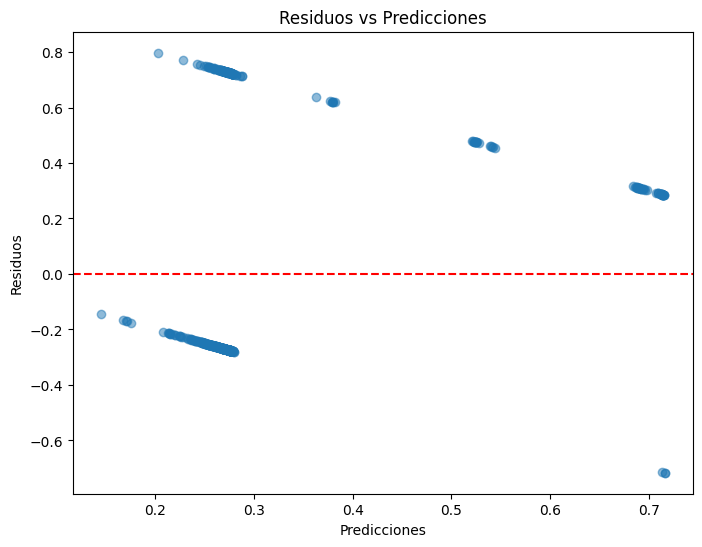

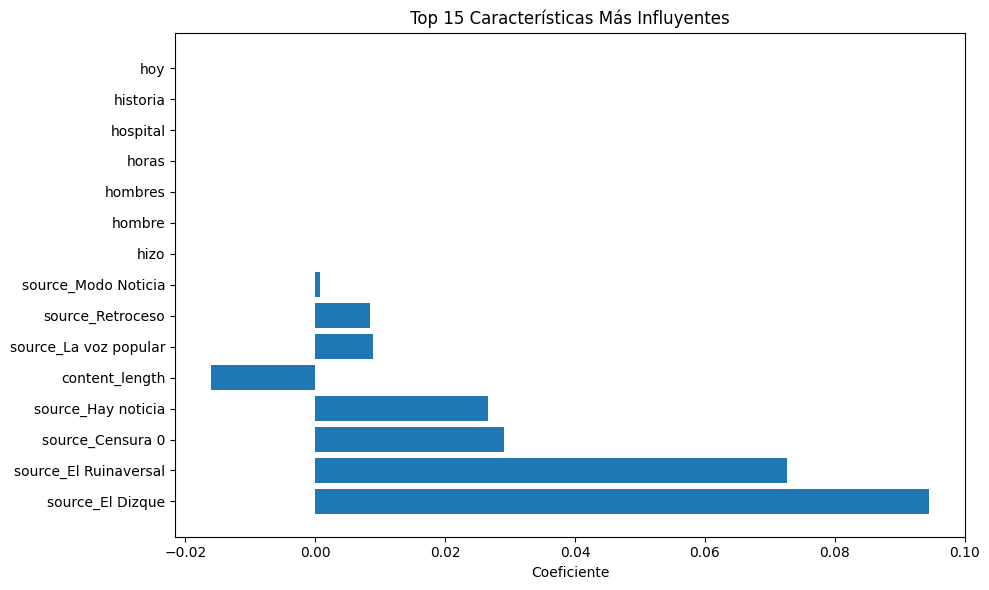

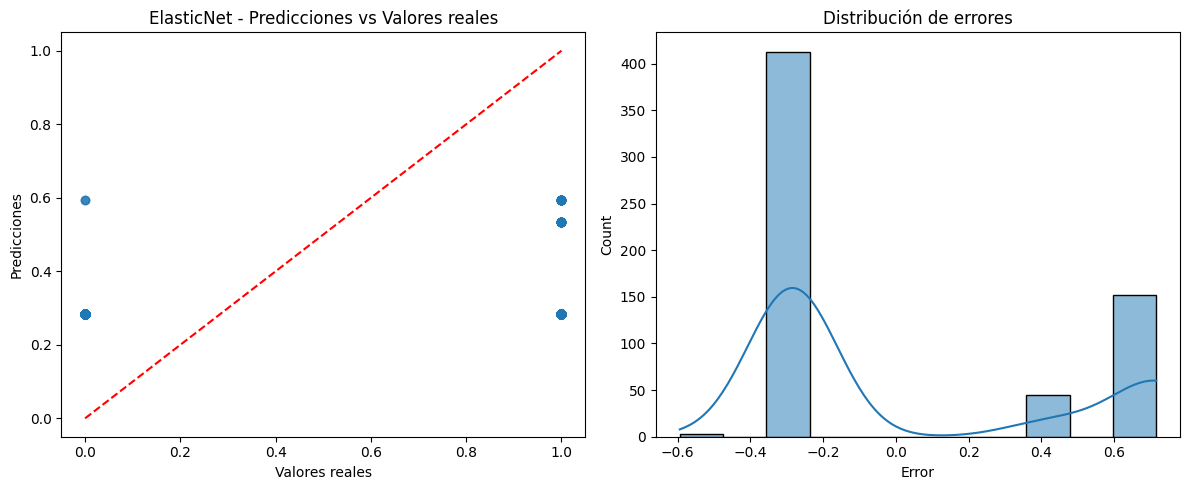

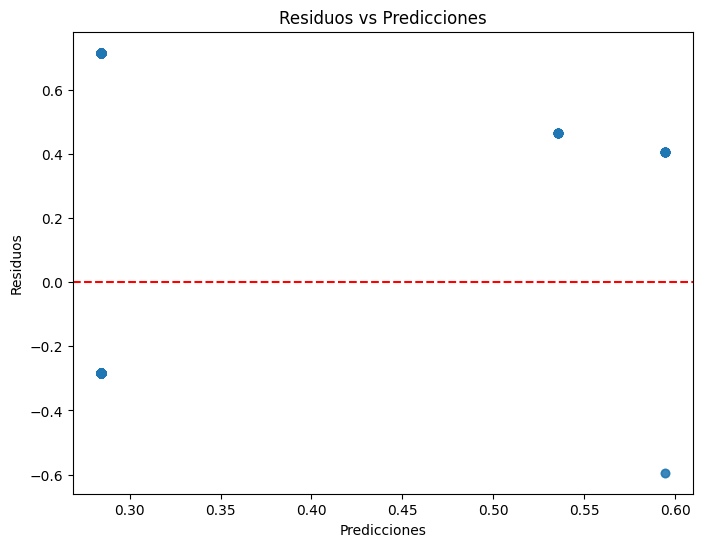

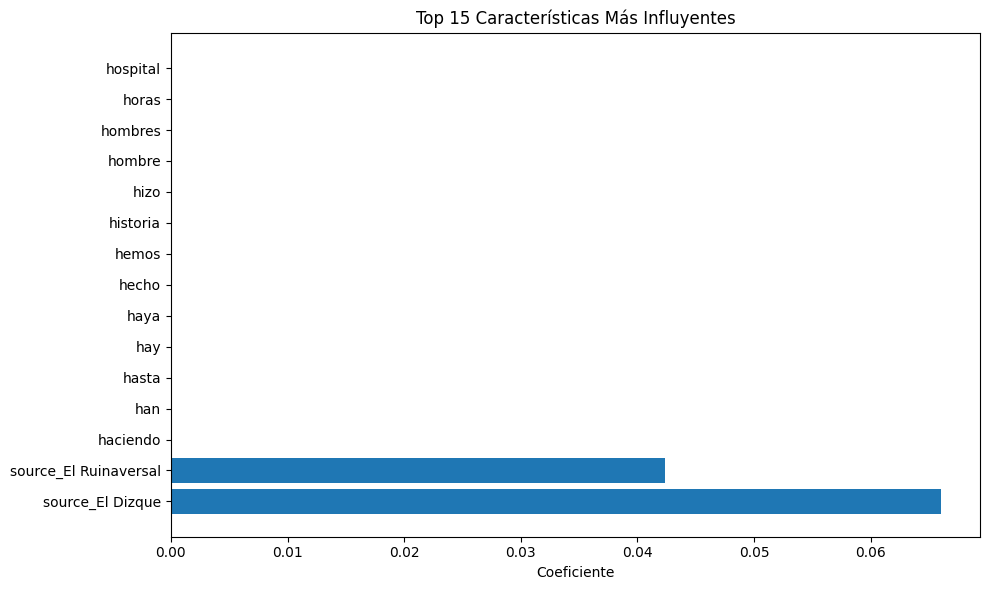

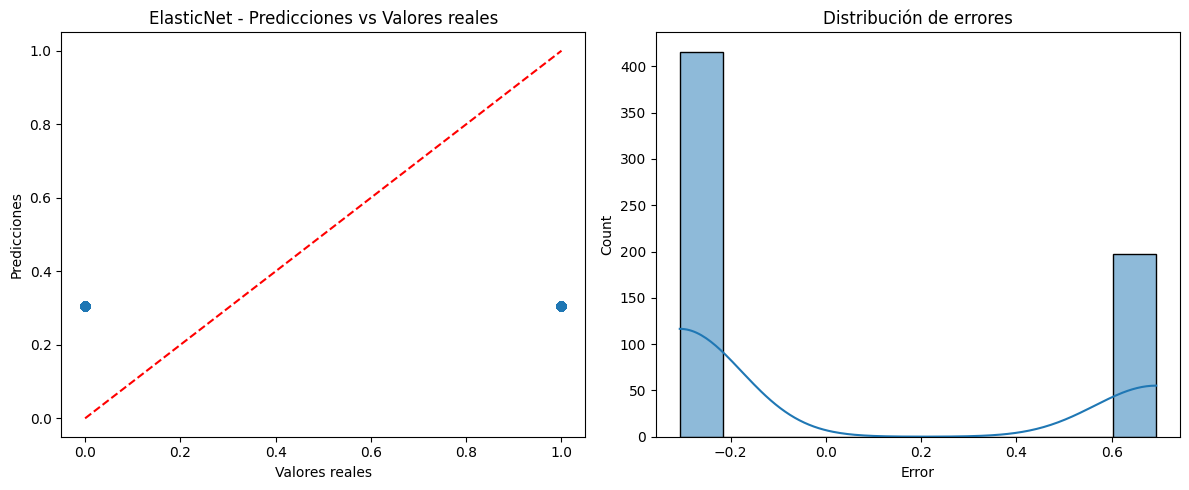

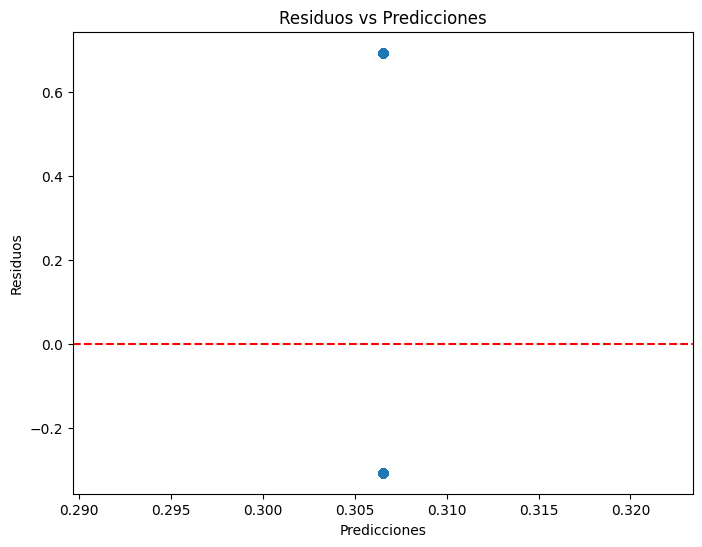

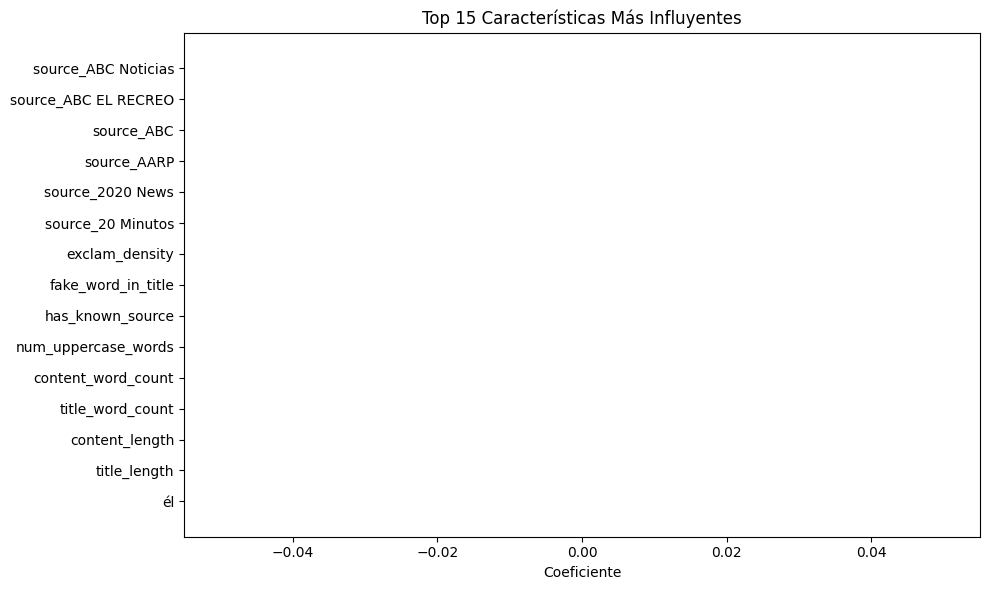

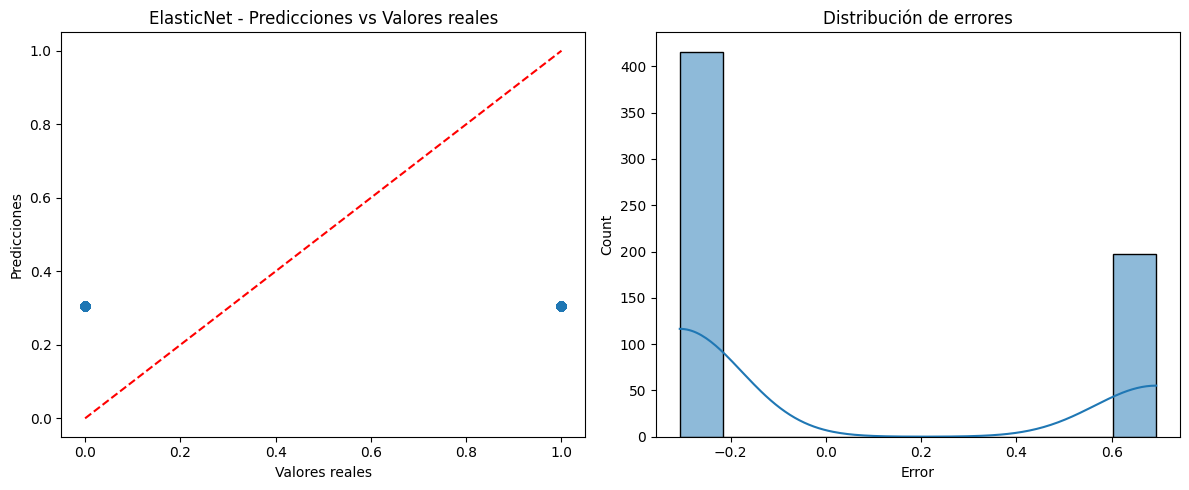

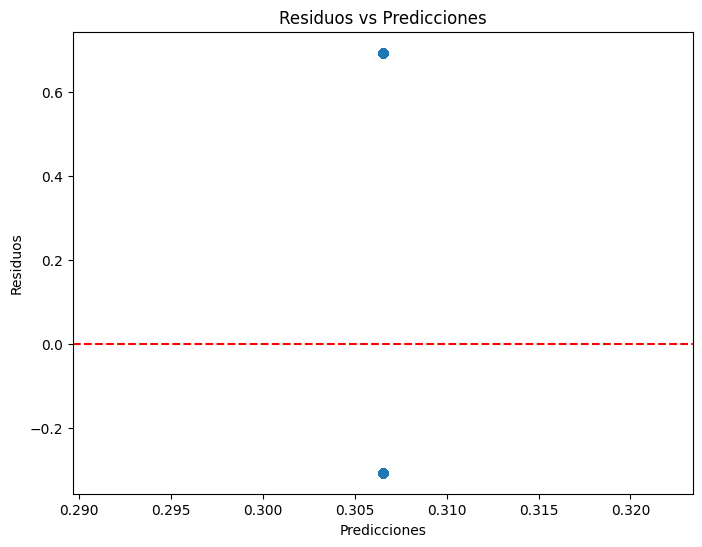

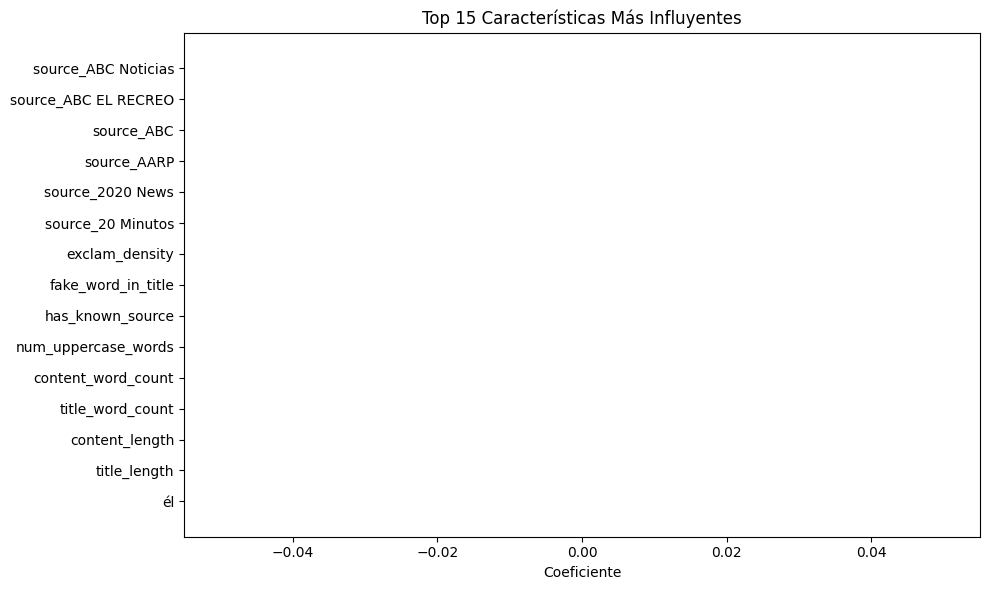

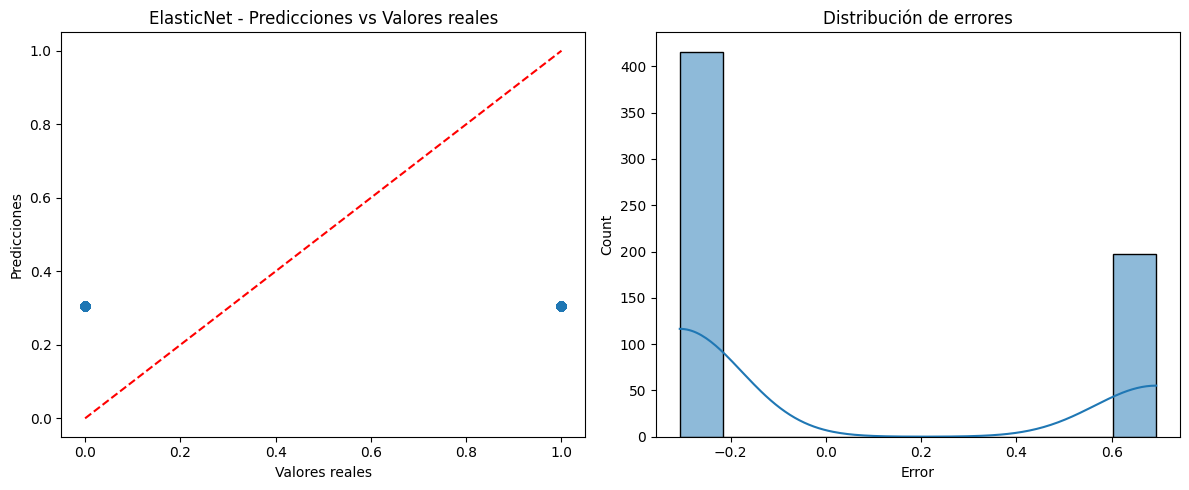

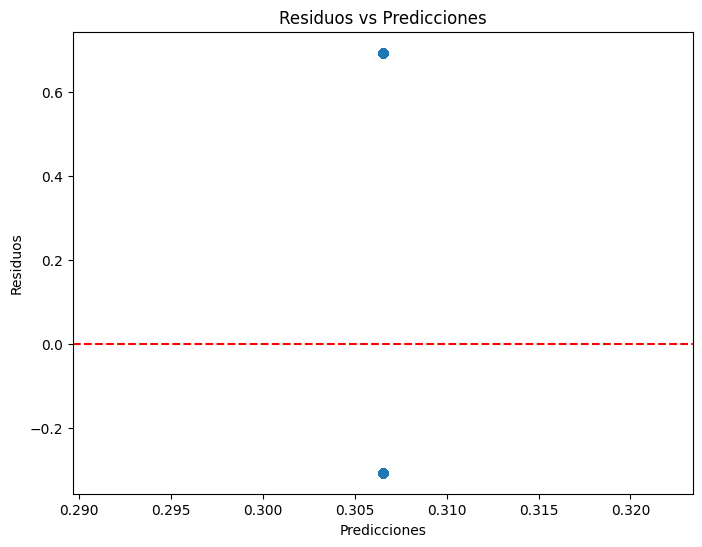

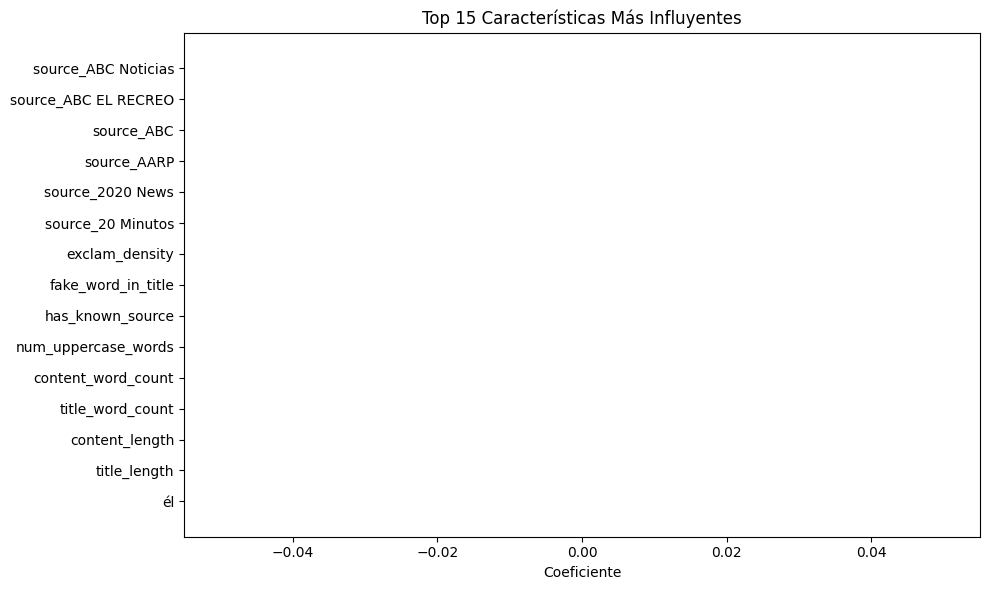

In [12]:
# -------------------- ENTRENAMIENTO Y EVALUACIÓN DEL MODELO --------------------

# Establece el nombre del experimento
experiment_name = "Regresión Noticias Falsas"
mlflow.set_experiment(experiment_name)
print(f"Experimento configurado: {experiment_name}")

# Definición de los modelos y sus hiperparámetros
models = {
    'LinearRegression': {
        'model': LinearRegression,
        'params': [{}]  # LinearRegression no tiene hiperparámetros para ajustar
    },
    'Ridge': {
        'model': Ridge,
        'params': ParameterGrid({
            'alpha': [0.01, 0.1, 1.0, 10.0],
            'solver': ['auto', 'svd', 'cholesky']
        })
    },
    'Lasso': {
        'model': Lasso,
        'params': ParameterGrid({
            'alpha': [0.01, 0.1, 1.0, 10.0],
            'max_iter': [1000, 3000]
        })
    },
    'ElasticNet': {
        'model': ElasticNet,
        'params': ParameterGrid({
            'alpha': [0.01, 0.1, 1.0],
            'l1_ratio': [0.2, 0.5, 0.8],
            'max_iter': [1000]
        })
    }
}

# Inicia la ejecución principal
with mlflow.start_run(run_name="Modelos Lineales") as parent_run:
    print(f"\nEjecución principal iniciada: {parent_run.info.run_id}")

    # Registra el dataset
    dataset = mlflow.data.from_pandas(df_clean, name="classical_models", targets="label")
    mlflow.log_input(dataset)

    # Establece etiquetas para la ejecución
    mlflow.set_tags({
        "modelo": "Regresión Lineal y Variantes",
        "preprocesamiento": "TF-IDF + Escalado",
        "experimentador": "AngelBReal"
    })

    # Variables para rastrear el mejor modelo
    best_model = None
    best_score = float('-inf')
    best_params = None
    best_model_name = None

    # Contador para el total de combinaciones
    total_combinations = sum(len(list(model_info['params'])) for model_info in models.values())
    current_combo = 0

    print(f"Total de modelos a probar: {total_combinations}")

    # Iterar sobre cada tipo de modelo
    for model_name, model_info in models.items():
        print(f"\n=== Probando modelo: {model_name} ===")

        # Iterar sobre cada combinación de hiperparámetros para este modelo
        for params in model_info['params']:
            current_combo += 1
            # Inicialización del modelo con los parámetros actuales
            if model_name == 'LinearRegression':
                model = model_info['model']()
                param_text = "sin hiperparámetros"
            else:
                model = model_info['model'](**params)
                param_text = str(params)

            print(f"\nCombinación {current_combo}/{total_combinations}:")
            print(f"Modelo: {model_name}, Parámetros: {param_text}")

            # Inicia una ejecución anidada para esta combinación
            run_name = f"{model_name} - {param_text}"
            with mlflow.start_run(run_name=run_name, nested=True) as child_run:
                try:
                    print(f"Ejecución anidada iniciada: {child_run.info.run_id}")

                    # Entrenamiento del modelo
                    print("Entrenando modelo...")
                    model.fit(X_train_scaled, y_train)

                    # Predicciones en el conjunto de prueba
                    predictions = model.predict(X_test_scaled)

                    # Cálculo de métricas
                    mse = mean_squared_error(y_test, predictions)
                    rmse = np.sqrt(mse)
                    mae = mean_absolute_error(y_test, predictions)
                    r2 = r2_score(y_test, predictions)

                    # Mostrar métricas
                    print(f"MSE: {mse:.6f}")
                    print(f"RMSE: {rmse:.6f}")
                    print(f"MAE: {mae:.6f}")
                    print(f"R²: {r2:.6f}")

                    # Registro de parámetros y métricas en MLflow
                    if model_name != 'LinearRegression':
                        mlflow.log_params(params)
                    mlflow.log_metric("mse", mse)
                    mlflow.log_metric("rmse", rmse)
                    mlflow.log_metric("mae", mae)
                    mlflow.log_metric("r2_score", r2)

                    # Crear y guardar visualización
                    plt.figure(figsize=(12, 5))

                    # Predicciones vs reales
                    plt.subplot(1, 2, 1)
                    plt.scatter(y_test, predictions, alpha=0.5)
                    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
                    plt.xlabel('Valores reales')
                    plt.ylabel('Predicciones')
                    plt.title(f'{model_name} - Predicciones vs Valores reales')

                    # Distribución de residuos
                    plt.subplot(1, 2, 2)
                    residuos = y_test - predictions
                    sns.histplot(residuos, kde=True)
                    plt.xlabel('Error')
                    plt.title('Distribución de errores')

                    plt.tight_layout()
                    plt.savefig(f'model_evaluation_{current_combo}.png')

                    # Registrar visualización en MLflow
                    mlflow.log_artifact(f'model_evaluation_{current_combo}.png')

                    # Registrar gráfico de residuos vs valores predichos (diagnóstico importante para regresión lineal)
                    plt.figure(figsize=(8, 6))
                    plt.scatter(predictions, residuos, alpha=0.5)
                    plt.axhline(y=0, color='r', linestyle='--')
                    plt.xlabel('Predicciones')
                    plt.ylabel('Residuos')
                    plt.title('Residuos vs Predicciones')
                    plt.savefig(f'residuals_plot_{current_combo}.png')
                    mlflow.log_artifact(f'residuals_plot_{current_combo}.png')

                    # Registro del modelo
                    mlflow.sklearn.log_model(model, "modelo_entrenado")

                    # Si es posible, visualiza coeficientes (no para todos los modelos)
                    try:
                        if hasattr(model, 'coef_'):
                            # Obtener las 15 características más importantes
                            coef = model.coef_
                            feature_names = X.columns

                            # Crear dataframe de coeficientes
                            coef_df = pd.DataFrame({
                                'Feature': feature_names,
                                'Coefficient': coef
                            })
                            coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])
                            coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False).head(15)

                            # Visualizar
                            plt.figure(figsize=(10, 6))
                            plt.barh(coef_df['Feature'], coef_df['Coefficient'])
                            plt.xlabel('Coeficiente')
                            plt.title('Top 15 Características Más Influyentes')
                            plt.tight_layout()
                            plt.savefig(f'coefficients_{current_combo}.png')
                            mlflow.log_artifact(f'coefficients_{current_combo}.png')
                    except Exception as e:
                        print(f"No se pudieron visualizar coeficientes: {e}")

                    # Actualizar el mejor modelo si es necesario
                    if r2 > best_score:
                        best_score = r2
                        best_model = model
                        best_params = params if model_name != 'LinearRegression' else {}
                        best_model_name = model_name
                        print("¡Nuevo mejor modelo encontrado!")

                except Exception as e:
                    print(f"Error en ejecución anidada: {e}")

    # Registrar información del mejor modelo en la ejecución principal
    if best_model is not None:
        print("\n=== MEJOR MODELO ENCONTRADO ===")
        print(f"Tipo: {best_model_name}")
        print(f"Parámetros: {best_params}")
        print(f"R²: {best_score:.6f}")

        # Registrar mejor modelo y parámetros en la ejecución principal
        mlflow.log_param("best_model_type", best_model_name)
        mlflow.log_param("best_params", best_params)
        mlflow.log_metric("best_r2_score", best_score)

        # Guardar el mejor modelo con un nombre especial
        with open('best_model_summary.txt', 'w') as f:
            f.write(f"Mejor tipo de modelo: {best_model_name}\n")
            f.write(f"Mejores parámetros: {best_params}\n")
            f.write(f"R² score: {best_score:.6f}\n")

        mlflow.log_artifact('best_model_summary.txt')

        # Registrar el mejor modelo con un nombre especial
        mlflow.sklearn.log_model(best_model, "best_model")
    else:
        print("No se encontró un modelo válido")

print("\nProceso completado.")